# Steam Store Games (Clean dataset)

Gathered around May 2019

Site: https://www.kaggle.com/datasets/nikdavis/steam-store-games

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


import collections
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
stm = pd.read_csv('steam.csv')
stm.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


# Data Cleaning



### Remove day and month from ‘release_date’
Take the year in the 'release date' as the release date for subsequent use, as the exact month and days are not important to us.

In [3]:
stm.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


### Remove day and month from ‘release_date’

Take the year in the 'release date' as the release date for subsequent use, as the exact month and days are not important to us.

In [4]:
stm['release_date']=pd.DatetimeIndex(stm['release_date']).year

### Normalize entries under playtime and ratings
 'positive ratings', 'negative ratings'.'average_playtime' and 'median_playtime' 

In [5]:
#normapt= pd.DataFrame(stm['average_playtime'])
#normapt=preprocessing.normalize(normapt)
#stm['average_playtime']=normapt
#normmpt= pd.DataFrame(stm['median_playtime'])
#normmpt=preprocessing.normalize(normmpt)
#stm['median_playtime']=normapt

stm.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [6]:
scaler = preprocessing.MinMaxScaler()
norm = pd.DataFrame(stm['average_playtime'])
stm['average_playtime']=scaler.fit_transform(norm)
norm2 = pd.DataFrame(stm['median_playtime'])
stm['median_playtime']=scaler.fit_transform(norm2)
stm.describe()

,appid,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000
mean,5.962035e+05,2016.498098,0.981127,0.354903,45.248864,1.000559e+03,211.027147,0.000786,0.000766,6.078193
std,2.508942e+05,2.156990,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,0.009584,0.012348,7.874922
min,1.000000e+01,1997.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.012300e+05,2016.000000,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000
50%,5.990700e+05,2017.000000,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000
75%,7.987600e+05,2018.000000,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000
max,1.069460e+06,2019.000000,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,1.000000,1.000000,421.990000


In [7]:
stm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  int64  
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  float64
 15  median_playtime   27075 non-null  float64
 16  owners            27075 non-null  object

positive_rating rate: pr/(pr+nr)

In [8]:
stm['positive_percentage']=(stm['positive_ratings']/(stm['negative_ratings']+ stm['positive_ratings']))
stm.describe()

,appid,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,positive_percentage
count,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,5.962035e+05,2016.498098,0.981127,0.354903,45.248864,1.000559e+03,211.027147,0.000786,0.000766,6.078193,0.714478
std,2.508942e+05,2.156990,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,0.009584,0.012348,7.874922,0.233594
min,1.000000e+01,1997.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.012300e+05,2016.000000,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000,0.583333
50%,5.990700e+05,2017.000000,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000,0.760331
75%,7.987600e+05,2018.000000,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000,0.893905
max,1.069460e+06,2019.000000,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,1.000000,1.000000,421.990000,1.000000


### Remove delimiters in ‘genres’, ‘categories’ and ‘steamspyt_ags’

In [9]:
stm['categories']=stm['categories'].str.split(';', expand=False)

In [10]:
stm['platforms']=stm['platforms'].str.split(';', expand=False)

In [11]:
stm['genres']=stm['genres'].str.split(';', expand=False)

In [12]:
stm['steamspy_tags']=stm['steamspy_tags'].str.split(';', expand=False)

In [13]:
stm["categories"]

0        [Multi-player, Online Multi-Player, Local Mult...
1        [Multi-player, Online Multi-Player, Local Mult...
2                 [Multi-player, Valve Anti-Cheat enabled]
3        [Multi-player, Online Multi-Player, Local Mult...
4        [Single-player, Multi-player, Valve Anti-Cheat...
                               ...                        
27070                  [Single-player, Steam Achievements]
27071                                      [Single-player]
27072    [Single-player, Multi-player, Co-op, Shared/Sp...
27073                         [Single-player, Steam Cloud]
27074                         [Single-player, Steam Cloud]
Name: categories, Length: 27075, dtype: object

### Calculating 'SteamDB_rating'

Combine rating percentage and total rating number by referring to Steam Database's rating algorithm.

https://steamdb.info/blog/steamdb-rating/

In [14]:
def GetRating( positiveVotes, negativeVotes ):
    totalVotes = positiveVotes + negativeVotes;
    average = positiveVotes / totalVotes;
    score = average - ( average - 0.5 ) * math.pow( 2, -(math.log10( totalVotes + 1 )) );

    return score * 100;
stm['SteamDB_rating'] = stm.apply(lambda row: GetRating( row.positive_ratings, row.negative_ratings ), axis = 1)


In [15]:
stm['SteamDB_rating'].describe()

count    27075.000000
mean        64.334930
std         14.306018
min         13.949300
25%         55.141418
50%         65.568867
75%         75.000000
max         97.276812
Name: SteamDB_rating, dtype: float64

### Extract numerical and catagorical values

In [16]:
stmNum=stm.select_dtypes(include = np.number)
stmNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                27075 non-null  int64  
 1   release_date         27075 non-null  int64  
 2   english              27075 non-null  int64  
 3   required_age         27075 non-null  int64  
 4   achievements         27075 non-null  int64  
 5   positive_ratings     27075 non-null  int64  
 6   negative_ratings     27075 non-null  int64  
 7   average_playtime     27075 non-null  float64
 8   median_playtime      27075 non-null  float64
 9   price                27075 non-null  float64
 10  positive_percentage  27075 non-null  float64
 11  SteamDB_rating       27075 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 2.5 MB


In [17]:
stmObj=stm.select_dtypes(include = object)
stmObj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           27075 non-null  object
 1   developer      27075 non-null  object
 2   publisher      27075 non-null  object
 3   platforms      27075 non-null  object
 4   categories     27075 non-null  object
 5   genres         27075 non-null  object
 6   steamspy_tags  27075 non-null  object
 7   owners         27075 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


# Exploratory Data Analysis


## Univariate visualization 

### Numerical data

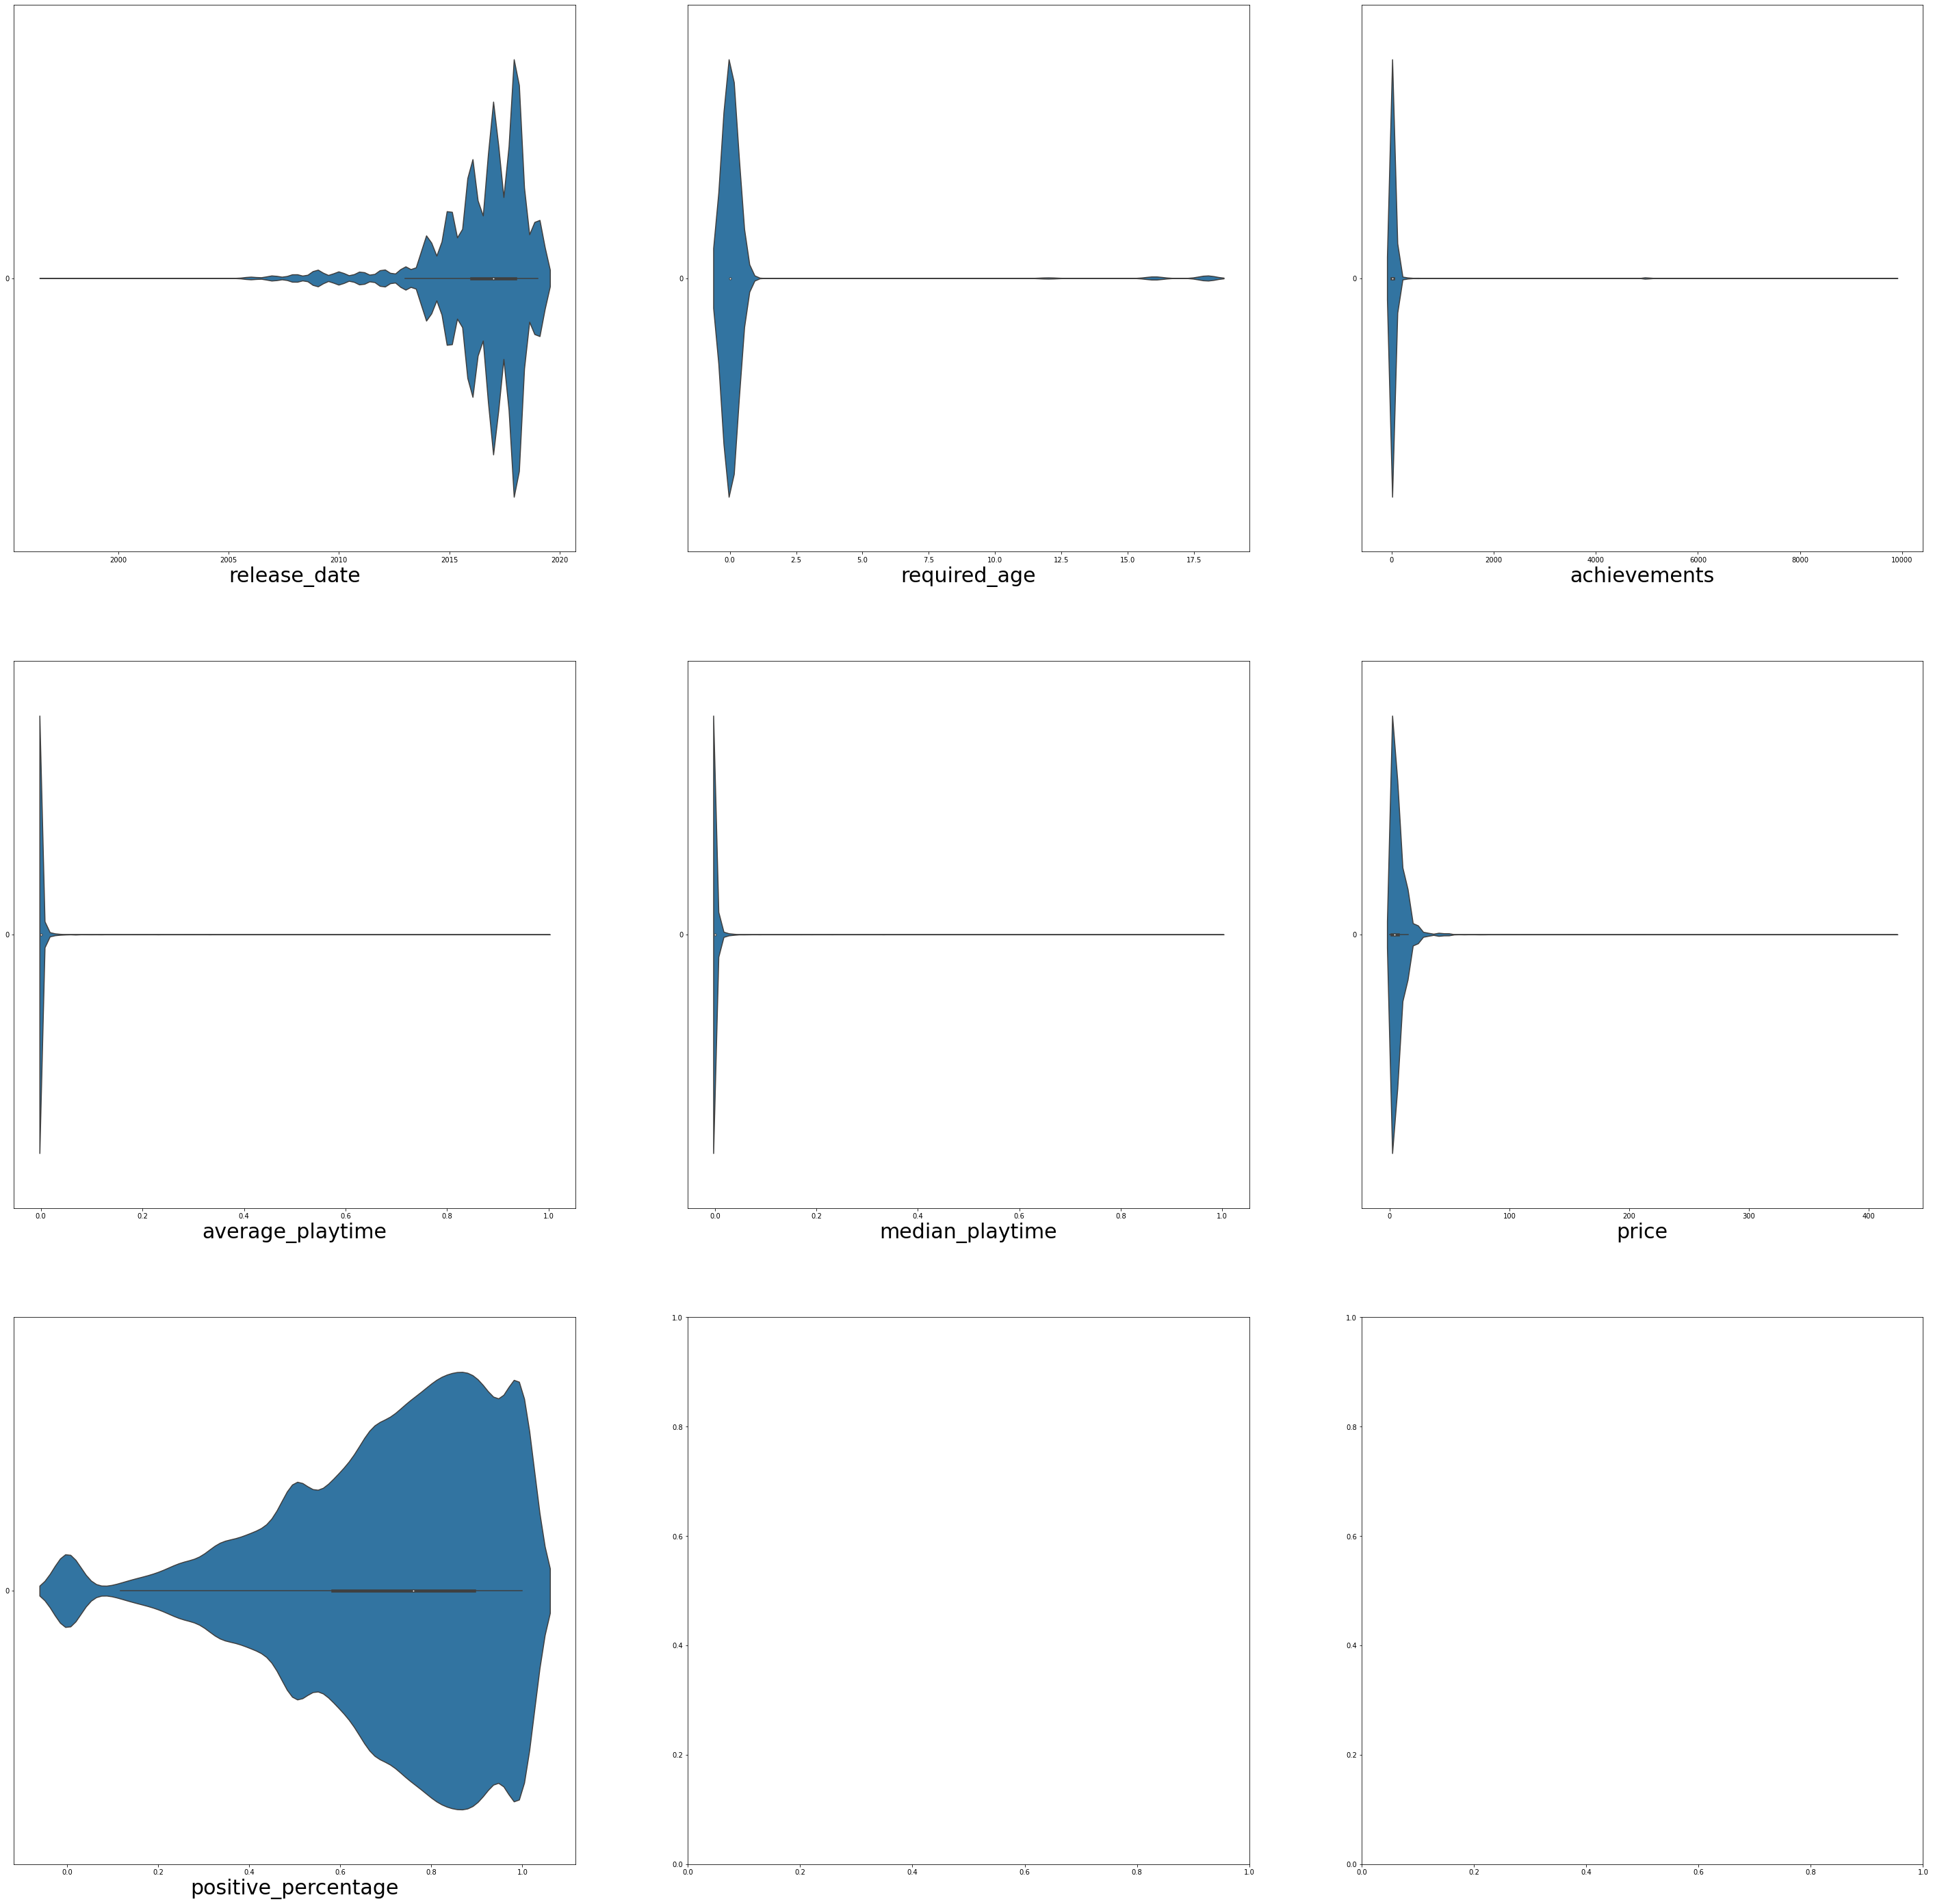

In [18]:
f, axes = plt.subplots(3,3,figsize=(50,50))
count = 0
row = 0
for var in stmNum.drop(columns=['appid','SteamDB_rating','positive_ratings','negative_ratings','english']):
    col=count % 3
    sb.violinplot(data = stmNum[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %3 == 0:
        row+=1


From the above graph, we can see that most of the numerical values,except for 'release_date', are quite skewed to both or either sides.

### 'release_date'

Number of Release Date : 23
2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_date, dtype: int64



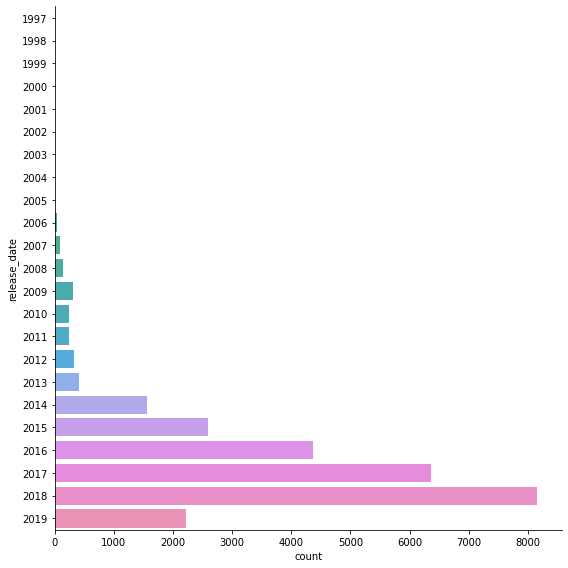

In [19]:
print("Number of Release Date :", len(stm["release_date"].unique()))
print(stm["release_date"].value_counts())
print()
sb.catplot(y = "release_date", data = stm, kind = "count", height = 8)


### SteamDB rating’ and our own definition of good games

'SteamDB rating' is one of our key variables. Here is an exploration of its distribution.

In [20]:
stm['SteamDB_rating'].describe()

count    27075.000000
mean        64.334930
std         14.306018
min         13.949300
25%         55.141418
50%         65.568867
75%         75.000000
max         97.276812
Name: SteamDB_rating, dtype: float64

In this sense, we define rating a new column 'tier' according to steamdatabase rating, but simplify to binary value: that is, take rated > q3 quartile as 'positively rated' (1), and the rest would be 'negatively rated' (0)

In [21]:
steamDB_q3=stm['SteamDB_rating'].quantile(q=0.75)
steamDB_q3=float(steamDB_q3)
cond=[((stm['SteamDB_rating'])>steamDB_q3),((stm['SteamDB_rating'])<=steamDB_q3)]
value=[1,0]
stm['tier']=np.select(cond,value)

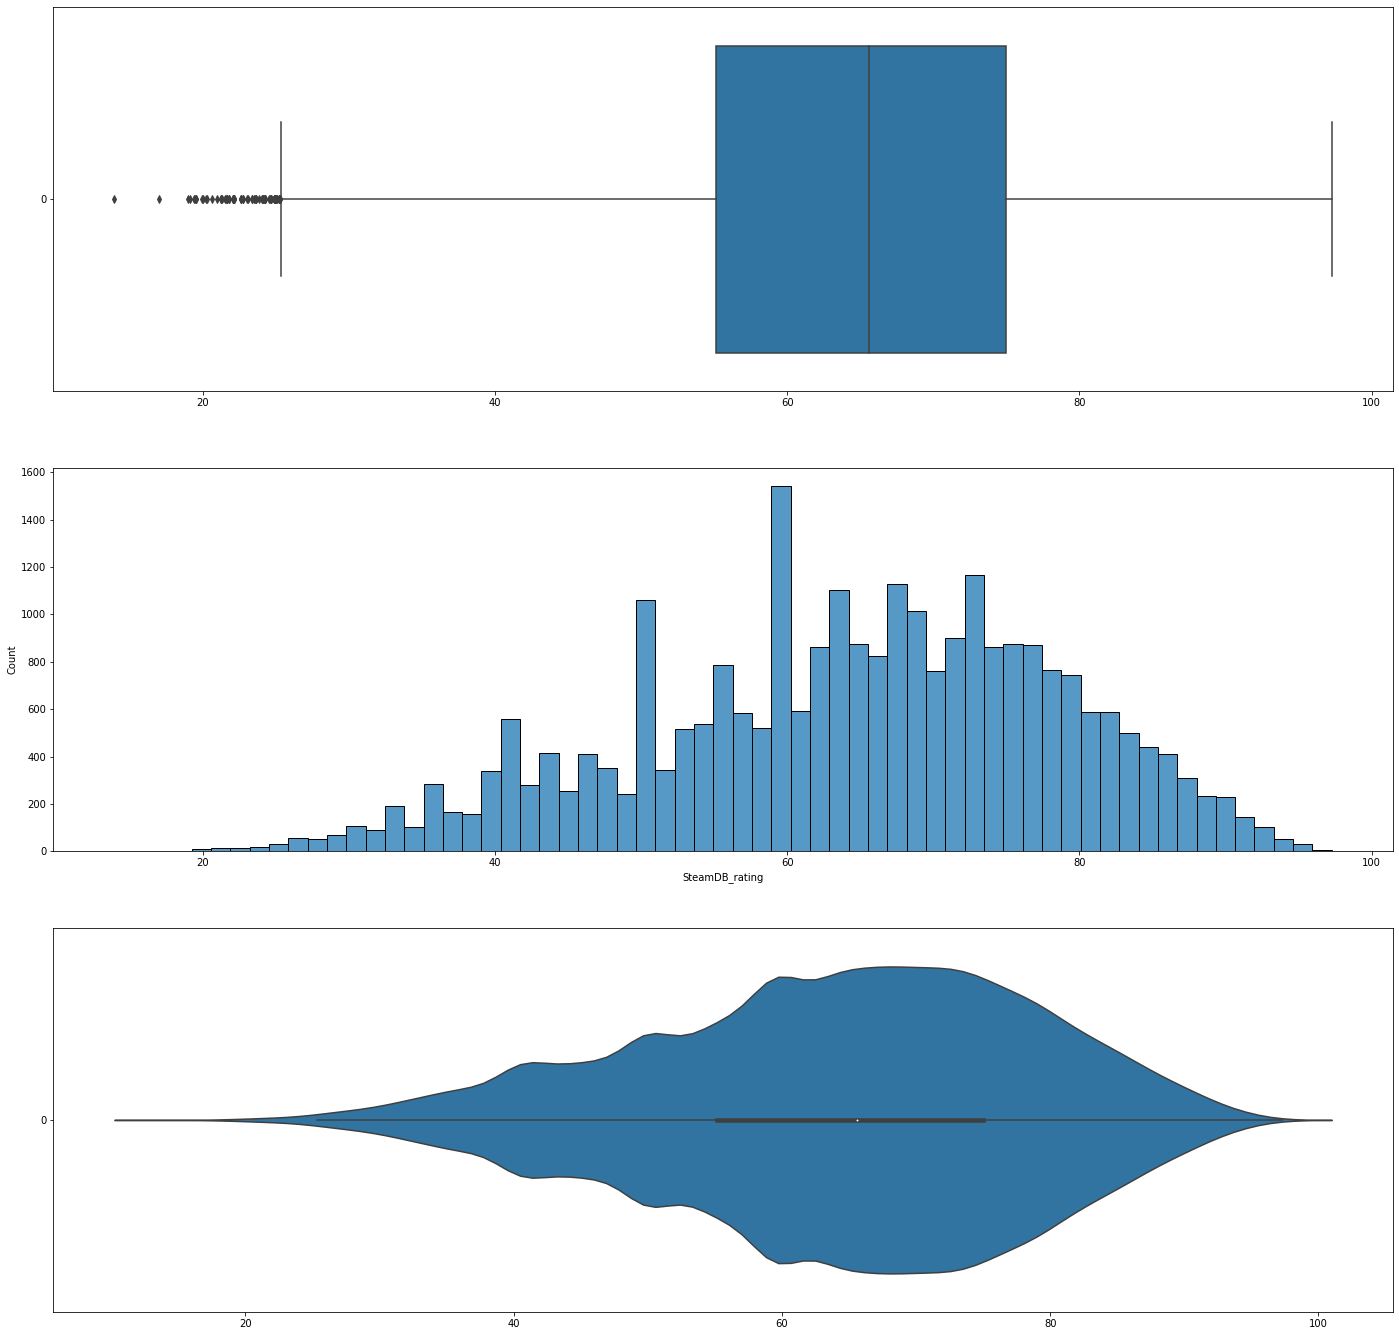

In [22]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = stm['SteamDB_rating'], orient = "h", ax = axes[0])
sb.histplot(data = stm['SteamDB_rating'],ax = axes[1])
sb.violinplot(data = stm['SteamDB_rating'], orient = "h", ax = axes[2])


Next is the information on 'tier':

0    20369
1     6706
Name: tier, dtype: int64


0    20369
1     6706
Name: tier, dtype: int64

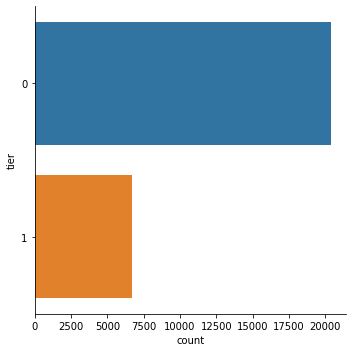

In [23]:
sb.catplot(y = "tier", data = stm, kind = "count", height = 5)
print(stm["tier"].value_counts())
stm['tier'].value_counts()


### Extract positively and negatively rated games:

In [24]:
pve=stm.loc[((stm['tier'])==1)]
nve=stm.loc[((stm['tier'])==0)]

In [25]:
pve.describe()

,appid,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,positive_percentage,SteamDB_rating,tier
count,6.706000e+03,6706.000000,6706.000000,6706.000000,6706.000000,6.706000e+03,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.0
mean,5.109088e+05,2015.895914,0.977781,0.624814,31.641813,3.239990e+03,387.452878,0.001746,0.001592,7.915547,0.907444,81.614401,1.0
std,2.560788e+05,2.638084,0.147406,3.193534,138.426348,3.713873e+04,5506.098836,0.016043,0.018956,8.319400,0.056276,4.762123,0.0
min,1.000000e+01,1997.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.757762,75.010233,1.0
25%,3.300750e+05,2015.000000,1.000000,0.000000,0.000000,4.900000e+01,4.000000,0.000000,0.000000,2.090000,0.865789,77.688348,1.0
50%,4.916850e+05,2017.000000,1.000000,0.000000,16.000000,2.000000e+02,22.000000,0.000000,0.000000,6.190000,0.910448,80.655938,1.0
75%,7.014100e+05,2018.000000,1.000000,0.000000,33.000000,9.477500e+02,115.000000,0.000929,0.000953,10.990000,0.950311,84.851041,1.0
max,1.064580e+06,2019.000000,1.000000,18.000000,5000.000000,2.644404e+06,402313.000000,1.000000,1.000000,209.990000,1.000000,97.276812,1.0


In [26]:
nve.describe()

,appid,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,positive_percentage,SteamDB_rating,tier
count,2.036900e+04,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.000000,20369.0
mean,6.242847e+05,2016.696352,0.982228,0.266042,49.728656,263.279886,152.943247,0.000470,0.000494,5.473289,0.650948,58.646083,0.0
std,2.426970e+05,1.932544,0.132125,2.075051,398.669358,4800.129600,3796.315021,0.006080,0.009170,7.626959,0.234933,11.571969,0.0
min,3.600000e+02,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.949300,0.0
25%,4.371700e+05,2016.000000,1.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1.690000,0.500000,50.000000,0.0
50%,6.451500e+05,2017.000000,1.000000,0.000000,2.000000,14.000000,7.000000,0.000000,0.000000,3.990000,0.682927,60.317655,0.0
75%,8.189500e+05,2018.000000,1.000000,0.000000,20.000000,49.000000,29.000000,0.000000,0.000000,6.990000,0.800000,67.968913,0.0
max,1.069460e+06,2019.000000,1.000000,18.000000,9821.000000,496184.000000,487076.000000,0.499646,0.999287,421.990000,1.000000,75.000000,0.0


## Catagorical data

### 'owners'

It can be seen that the number of game releases has increased year by year, especially in 2014 - 2018 with rapid growth. 2019 has fewer games as this dataset is gathered around May 2019.

Number of owners : 13
0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64



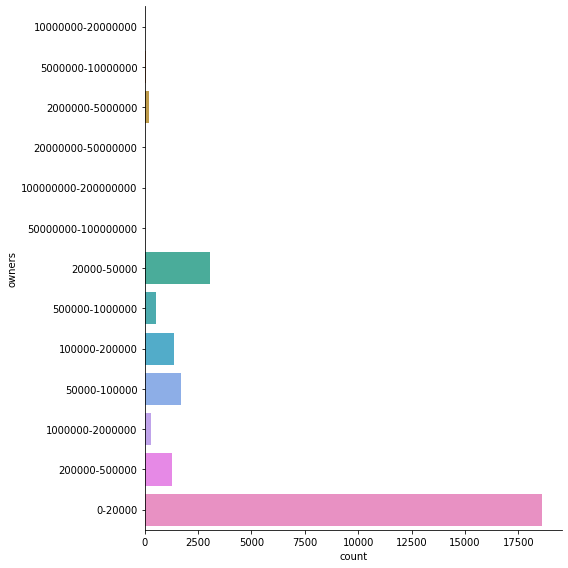

In [27]:
print("Number of owners :", len(stm["owners"].unique()))
print(stm["owners"].value_counts())
print()
sb.catplot(y = "owners", data = stm, kind = "count", height = 8)


The graph shows that most games have less than 20,000 owners, and only a very few games have more than 50,000,000 owners.



### ‘genres’, ‘categories’, 'platforms' and ‘steamspy_tags’

Since multiple ‘genres’, 'platforms', ‘categories’ and ‘steamspy_tags’are attached to one game, we define a function called get_labels to extract uniques values of these columns.

In [28]:
stmNum=stm.select_dtypes(include = np.number)
stmNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                27075 non-null  int64  
 1   release_date         27075 non-null  int64  
 2   english              27075 non-null  int64  
 3   required_age         27075 non-null  int64  
 4   achievements         27075 non-null  int64  
 5   positive_ratings     27075 non-null  int64  
 6   negative_ratings     27075 non-null  int64  
 7   average_playtime     27075 non-null  float64
 8   median_playtime      27075 non-null  float64
 9   price                27075 non-null  float64
 10  positive_percentage  27075 non-null  float64
 11  SteamDB_rating       27075 non-null  float64
 12  tier                 27075 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.7 MB


Since multiple ‘genres’, 'platforms', ‘categories’ and ‘steamspy_tags’are attached to one game, we define a function called get_labels to extract uniques values of these columns.

In [29]:
def get_labels(data):
  unique_labels = []
  all_labels = []

  for i in range(len(data)):
    for label in data[i]:
      all_labels.append(label)
      if label not in unique_labels:
        unique_labels.append(label)
  
  print('Number of unique labels:', len(unique_labels))
  print('Number of total labels applied:', len(all_labels))
  
  return unique_labels, all_labels 


Number of unique labels: 3
Number of total labels applied: 40371

['windows', 'mac', 'linux']


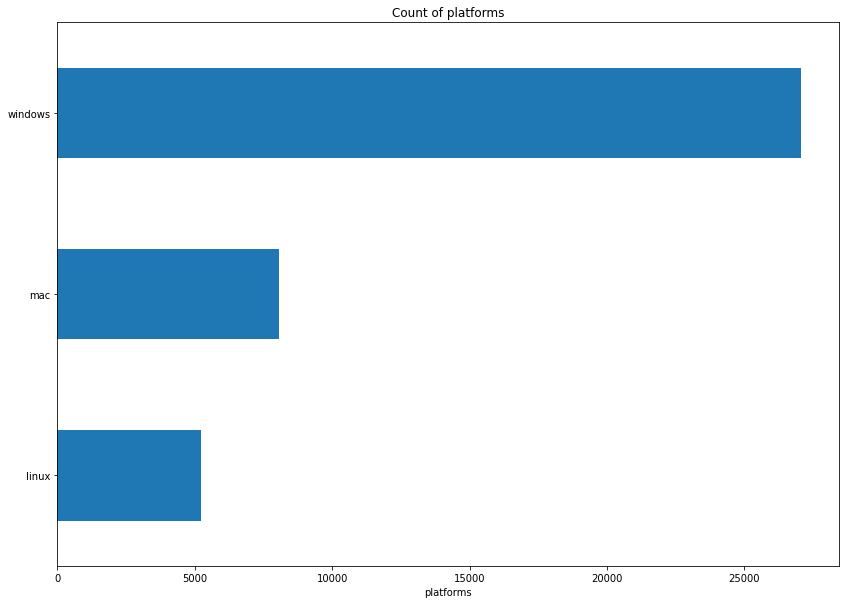

In [30]:
print()
unique_cats, all_cats = get_labels(stm['platforms'])
print()
print(unique_cats[:20])
plt.figure(figsize = (14, 10))
pd.Series(all_cats).value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('platforms')
plt.title('Count of platforms')
plt.show()

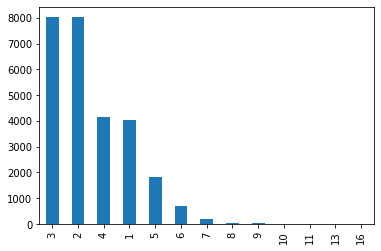

In [31]:
stm['genres'].apply(lambda x: len(x)).value_counts().plot(kind = 'bar')

In [32]:

print()
unique_genres, all_cats = get_labels(stm['genres'])
print()
print(unique_genres[:20])


Number of unique labels: 29
Number of total labels applied: 76462

['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Animation & Modeling', 'Video Production', 'Casual', 'Simulation', 'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Utilities', 'Design & Illustration', 'Web Publishing']


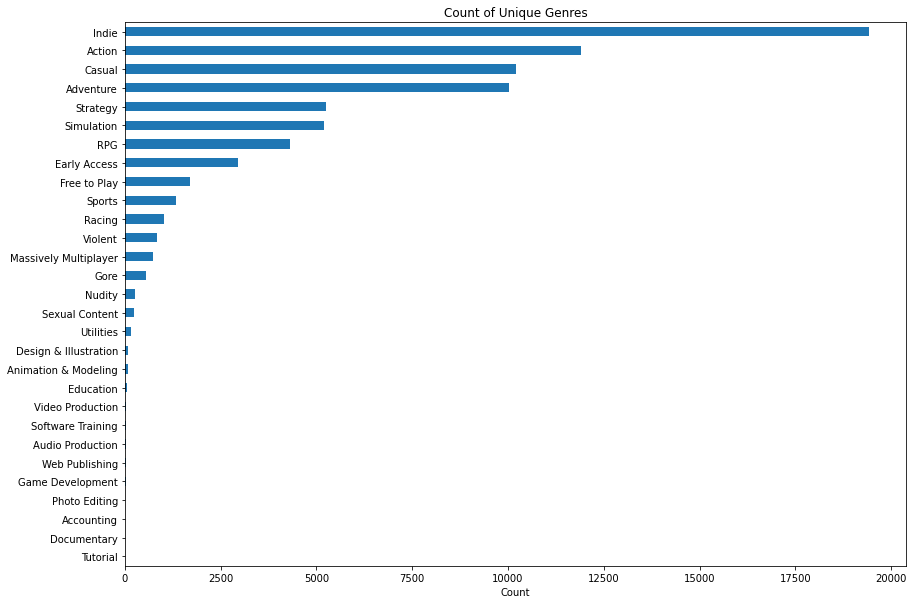

In [33]:
plt.figure(figsize = (14, 10))
pd.Series(all_cats).value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.title('Count of Unique Genres')
plt.show()

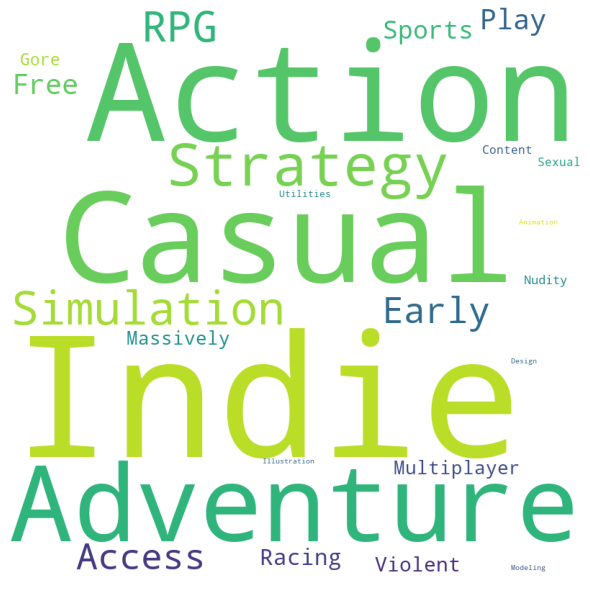

In [34]:
cloud=[lists for lists in stm['genres']]
data = " ".join([" ".join(x) for x in cloud])


wordcloud = WordCloud(collocations=False, width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(data)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Indie, action and casual games have the largest number.

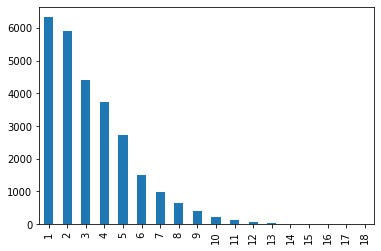

In [35]:
stm['categories'].apply(lambda x: len(x)).value_counts().plot(kind = 'bar')

Number of unique labels: 29
Number of total labels applied: 89726
['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards', 'Captions available', 'Partial Controller Support', 'Includes Source SDK', 'Cross-Platform Multiplayer', 'Stats', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op', 'Full controller support', 'Steam Leaderboards']


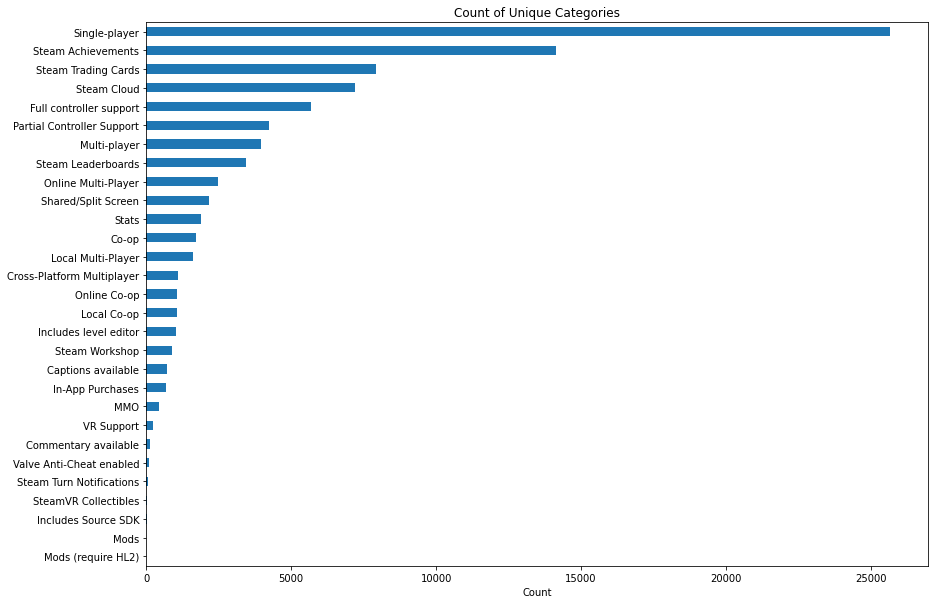

In [36]:
unique_cats, all_cats = get_labels(stm['categories'])
print(unique_cats[:20])
plt.figure(figsize = (14, 10))
pd.Series(all_cats).value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.title('Count of Unique Categories')
plt.show()

Number of unique labels: 339
Number of total labels applied: 78002
['Action', 'FPS', 'Multiplayer', 'World War II', 'Sci-fi', 'Classic', 'Singleplayer', 'Puzzle', 'First-Person', 'Free to Play', 'Zombies', 'Co-op', 'MOBA', 'Strategy', 'Shooter', 'Indie', 'Fighting', 'Cyberpunk', 'RTS', 'Hacking']


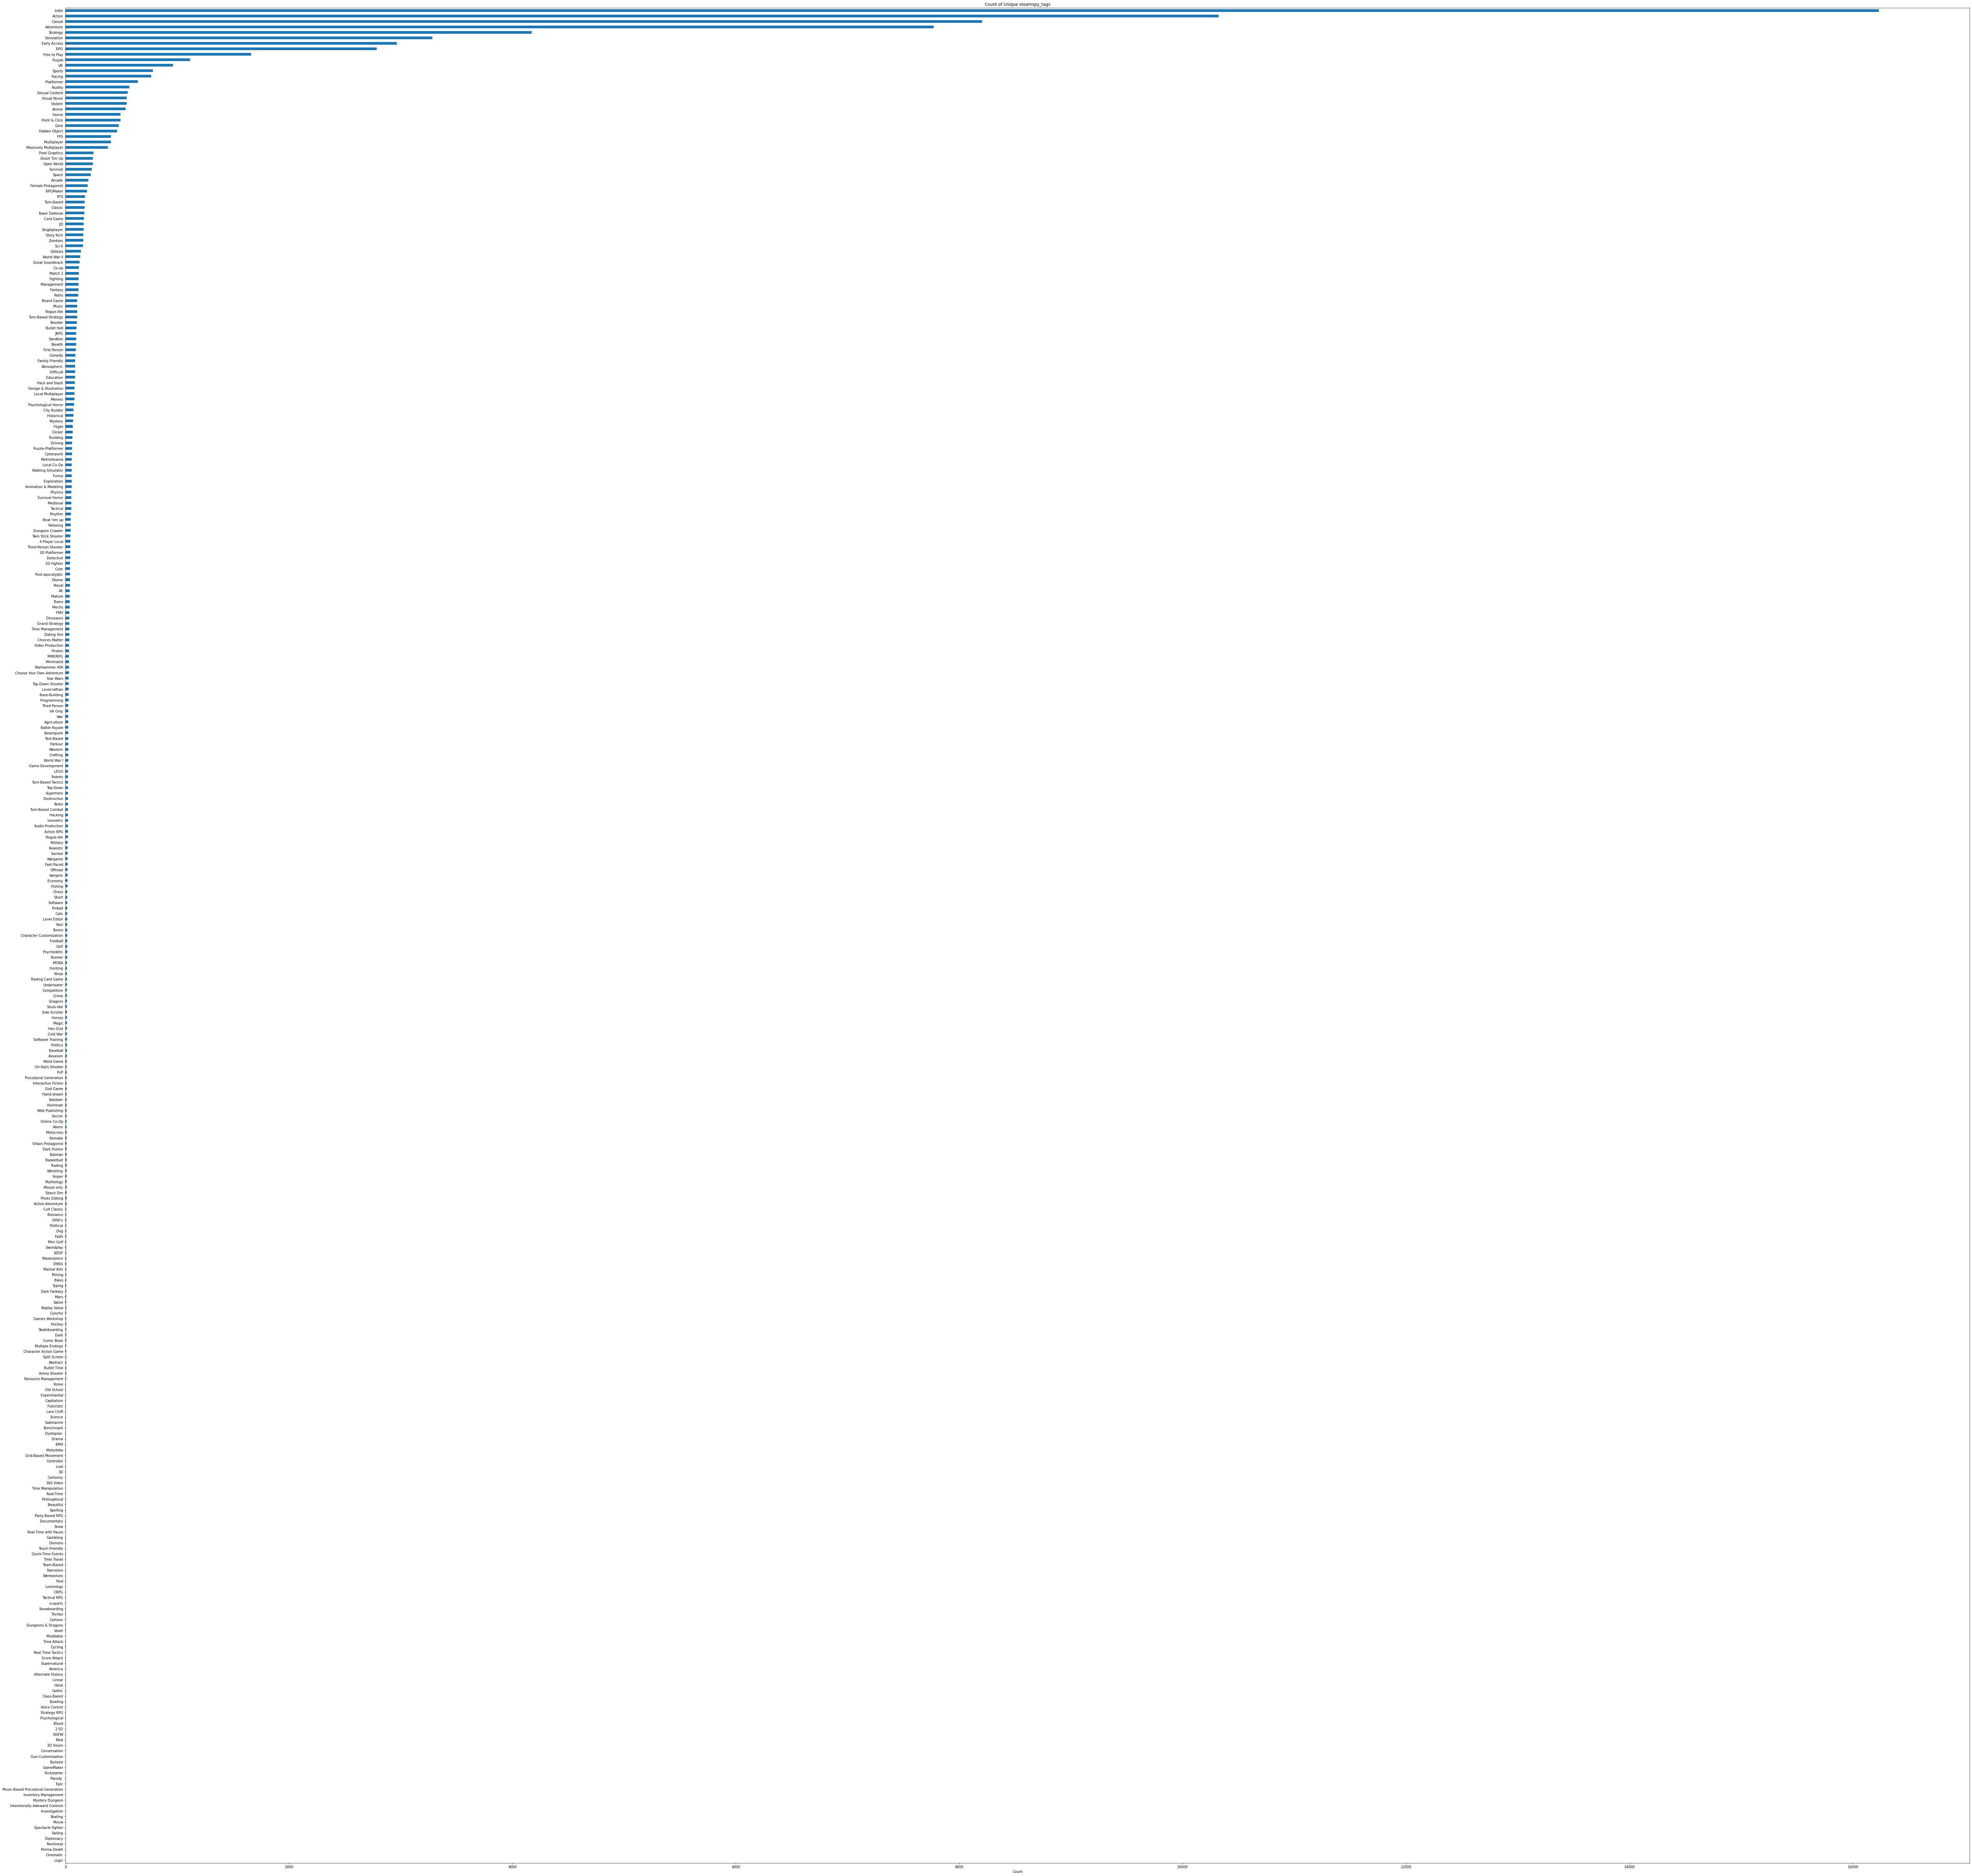

In [37]:
unique_cats, all_cats = get_labels(stm['steamspy_tags'])

print(unique_cats[:20])
plt.figure(figsize = (100, 100))
pd.Series(all_cats).value_counts().plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.title('Count of Unique steamspy_tags')
plt.show()

# Bivariate visualization

### Decision on which to represent genrres

We initially decided use 'genres' from 'steam.csv' to do the bivariate EDA.

In [38]:
stm['genres']

0                          [Action]
1                          [Action]
2                          [Action]
3                          [Action]
4                          [Action]
                    ...            
27070    [Adventure, Casual, Indie]
27071    [Action, Adventure, Indie]
27072       [Action, Casual, Indie]
27073    [Adventure, Casual, Indie]
27074    [Adventure, Casual, Indie]
Name: genres, Length: 27075, dtype: object

Howwever, we can conclude from the above graph that genres of each game is ordered alphabetically. In this sense, if we continue to use 'genres' from 'steam.csv'，subsequent results can produce bias.

Thus, we try to use the most voted opiton in file 'steamspy_tag_data.csv' as the tag for subsequent analysis instead.

In [39]:
tag = pd.read_csv('steamspy_tag_data.csv')
tag.head()


,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Columns: 372 entries, appid to e_sports
dtypes: int64(372)
memory usage: 82.4 MB


tag originally has 372 columns, however, we only have 29 unique genres.

So we need to drop coloums that do not in genres.

In [41]:
appid=tag['appid']
appid.head()

0    10
1    20
2    30
3    40
4    50
Name: appid, dtype: int64

In [42]:
unique_g=pd.Series(unique_genres)
unique_g=unique_g.str.lower()
unique_g.replace('\s+', '_',regex=True,inplace=True)
unique_g=unique_g.values.tolist()
print(unique_g)

['action', 'free_to_play', 'strategy', 'adventure', 'indie', 'rpg', 'animation_&_modeling', 'video_production', 'casual', 'simulation', 'racing', 'violent', 'massively_multiplayer', 'nudity', 'sports', 'early_access', 'gore', 'utilities', 'design_&_illustration', 'web_publishing', 'education', 'software_training', 'sexual_content', 'audio_production', 'game_development', 'photo_editing', 'accounting', 'documentary', 'tutorial']


In [43]:
votedtag=tag.copy()
votedtag=votedtag.loc[:, votedtag.columns.intersection(unique_g)]
votedtag.head()

,action,adventure,animation_&_modeling,audio_production,casual,design_&_illustration,documentary,early_access,education,free_to_play,...,sexual_content,simulation,software_training,sports,strategy,tutorial,utilities,video_production,violent,web_publishing
0,2681,0,0,0,0,0,0,0,0,0,...,0,0,0,0,329,0,0,0,40,0
1,208,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,0
2,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,211,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Extract the moset voted genres as the genres we are going to use:

In [44]:
votedtag['most_voted_tag']=votedtag.idxmax(axis=1)
votedtag['most_voted_tag']

0           action
1           action
2           action
3           action
4           action
           ...    
29017    adventure
29018       action
29019       action
29020       casual
29021       casual
Name: most_voted_tag, Length: 29022, dtype: object

In [45]:
count_nan = len(votedtag['most_voted_tag']) - votedtag['most_voted_tag'].count()
print("Number of NaN entries under most_voted_tag; ",count_nan)

Number of NaN entries under most_voted_tag;  0


In [46]:
votedtag['most_voted_tag'].value_counts()

action                   8101
casual                   4351
indie                    4301
adventure                3876
strategy                 1546
free_to_play             1507
simulation               1260
rpg                      1110
early_access              573
racing                    453
sports                    325
sexual_content            314
nudity                    276
utilities                 179
gore                      134
animation_&_modeling      116
massively_multiplayer     112
design_&_illustration     107
education                 104
audio_production           77
video_production           64
violent                    60
software_training          27
game_development           26
photo_editing              14
web_publishing              6
documentary                 3
Name: most_voted_tag, dtype: int64

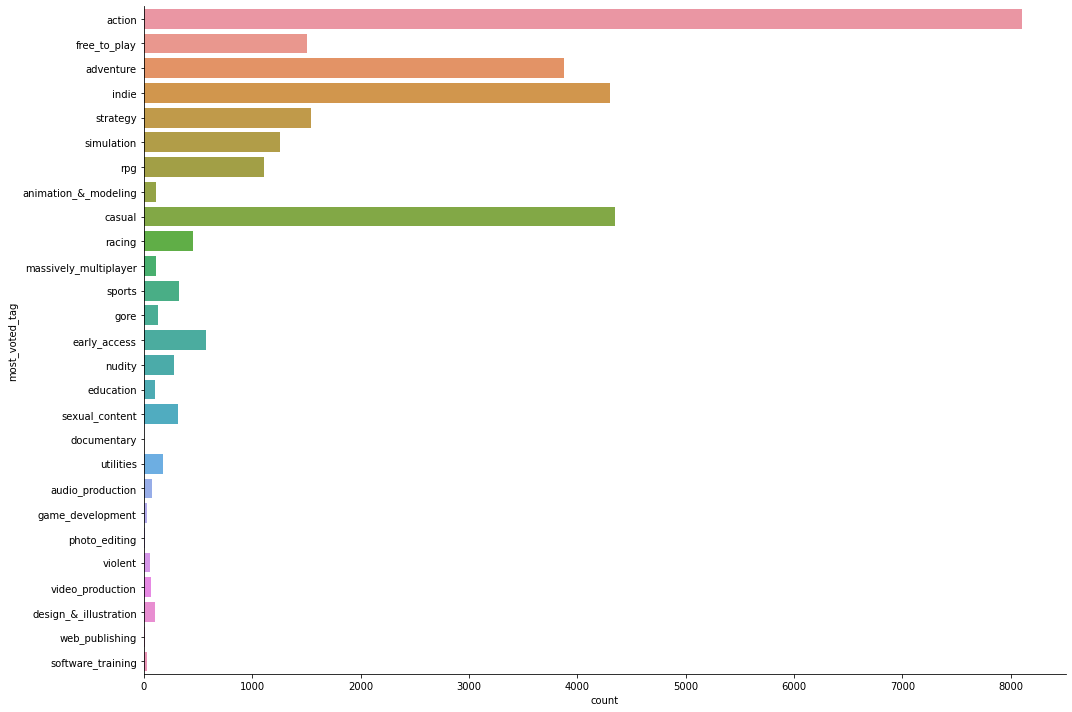

In [47]:
sb.catplot(y = 'most_voted_tag', data = votedtag, kind = "count", height= 10, aspect= 1.5)

Concat appid and most voted tag for subsquently matching with entries in 'steam.csv'

In [48]:
idandtag=pd.concat([appid,votedtag['most_voted_tag']], axis=1)
idandtag

,appid,most_voted_tag
0,10,action
1,20,action
2,30,action
3,40,action
4,50,action
...,...,...
29017,1065230,adventure
29018,1065570,action
29019,1065650,action
29020,1066700,casual


In [49]:
stm = pd.merge(stm, idandtag, on='appid')

stm=stm.dropna(how='any')

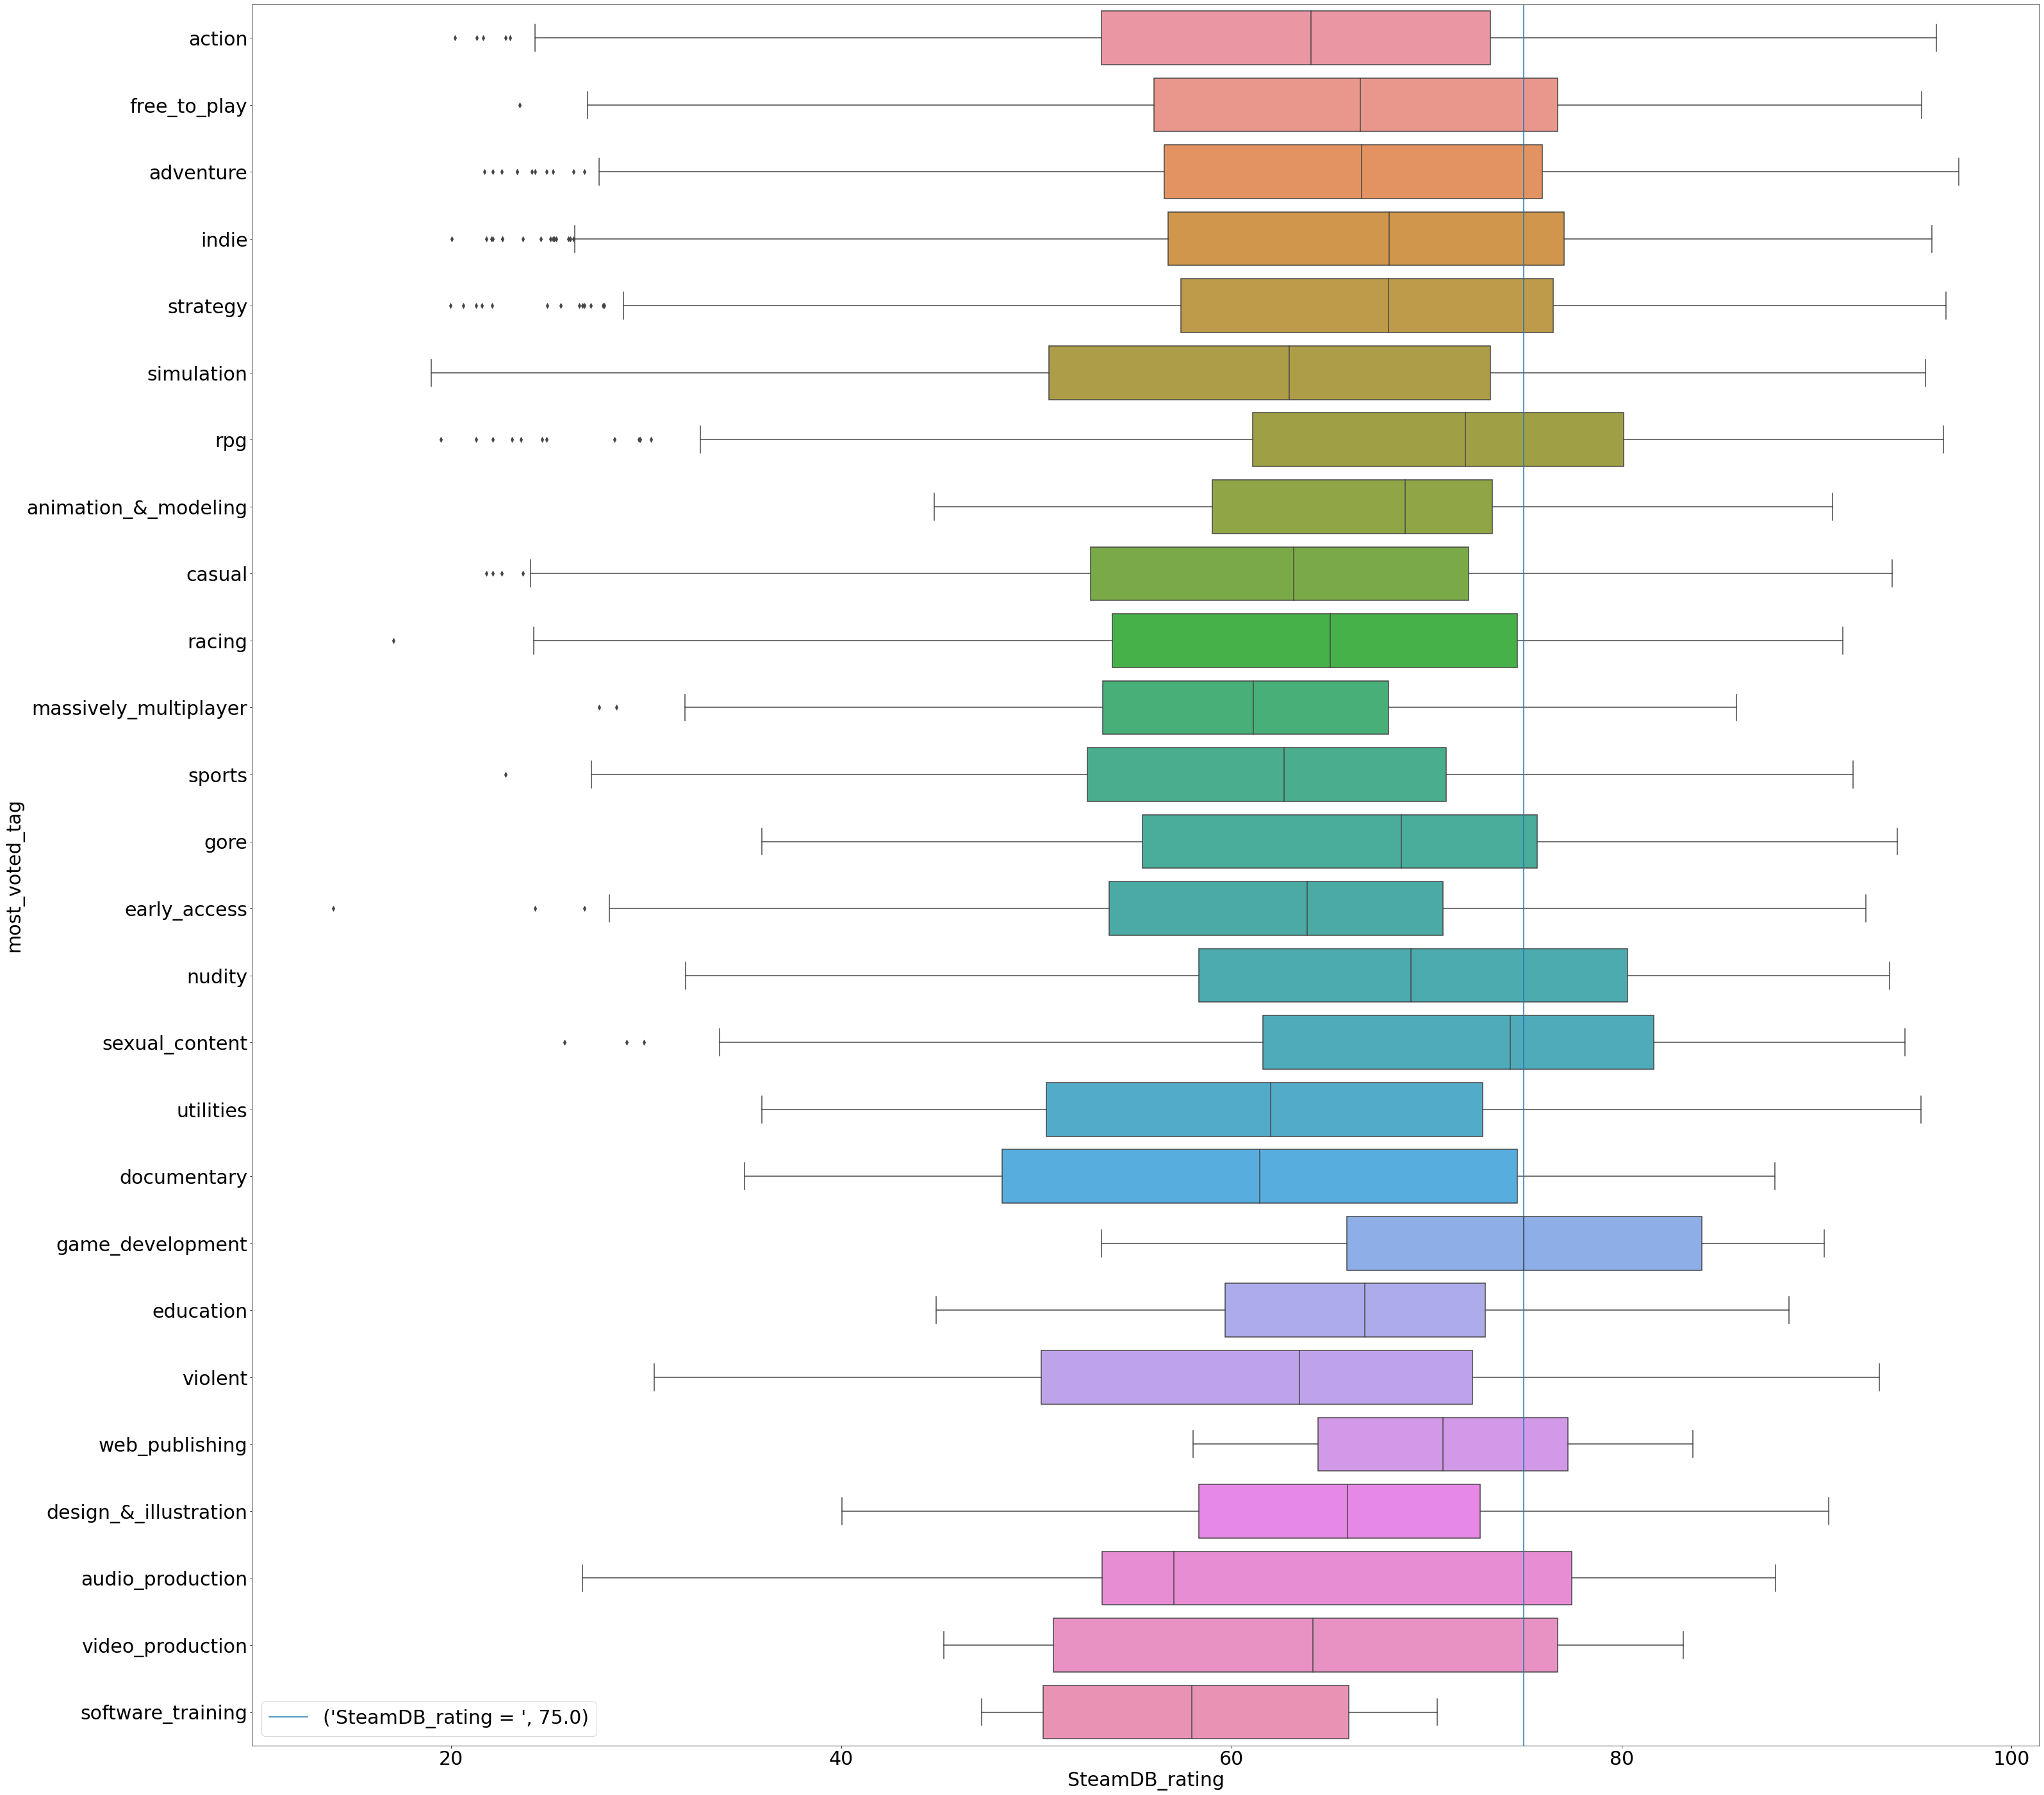

In [50]:
f, ax= plt.subplots(figsize=(50, 50))
sb.boxplot(x = "SteamDB_rating", y = 'most_voted_tag', data = stm, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("SteamDB_rating",fontsize=30)
ax.set_ylabel('most_voted_tag',fontsize=30)
plt.axvline(steamDB_q3, label= ("SteamDB_rating = ",steamDB_q3))
plt.legend(fontsize=30)
plt.savefig('votedvsrating.png')
plt.show()

### 'owners' ,'english' and 'release_date' vs 'tier' and 'SteamDB_rating'

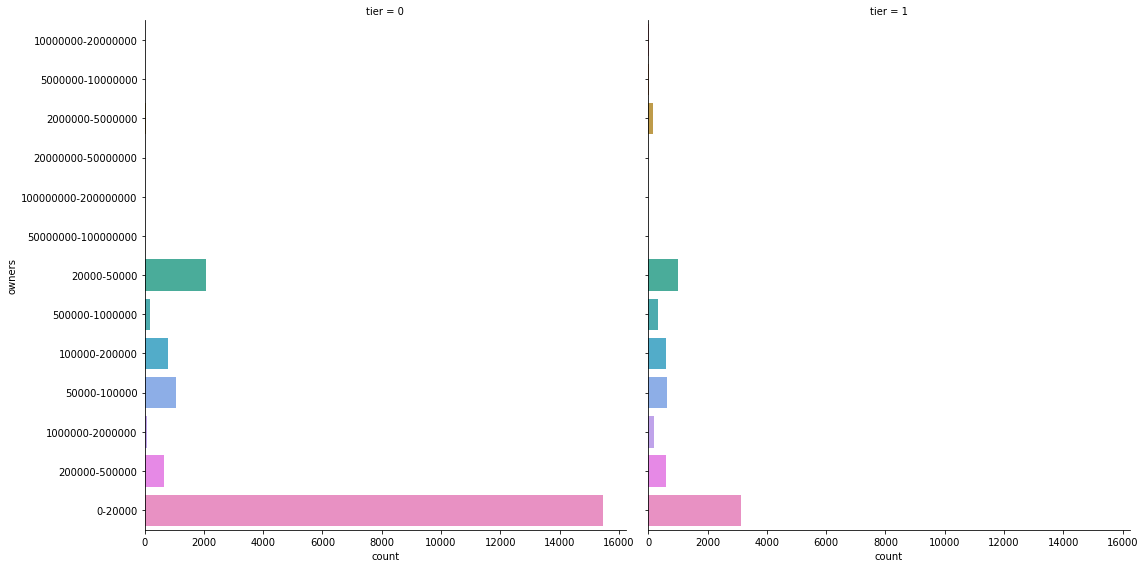

In [51]:
sb.catplot(y = 'owners', data = stm, col = 'tier', kind = 'count', col_wrap = 2, height = 8)

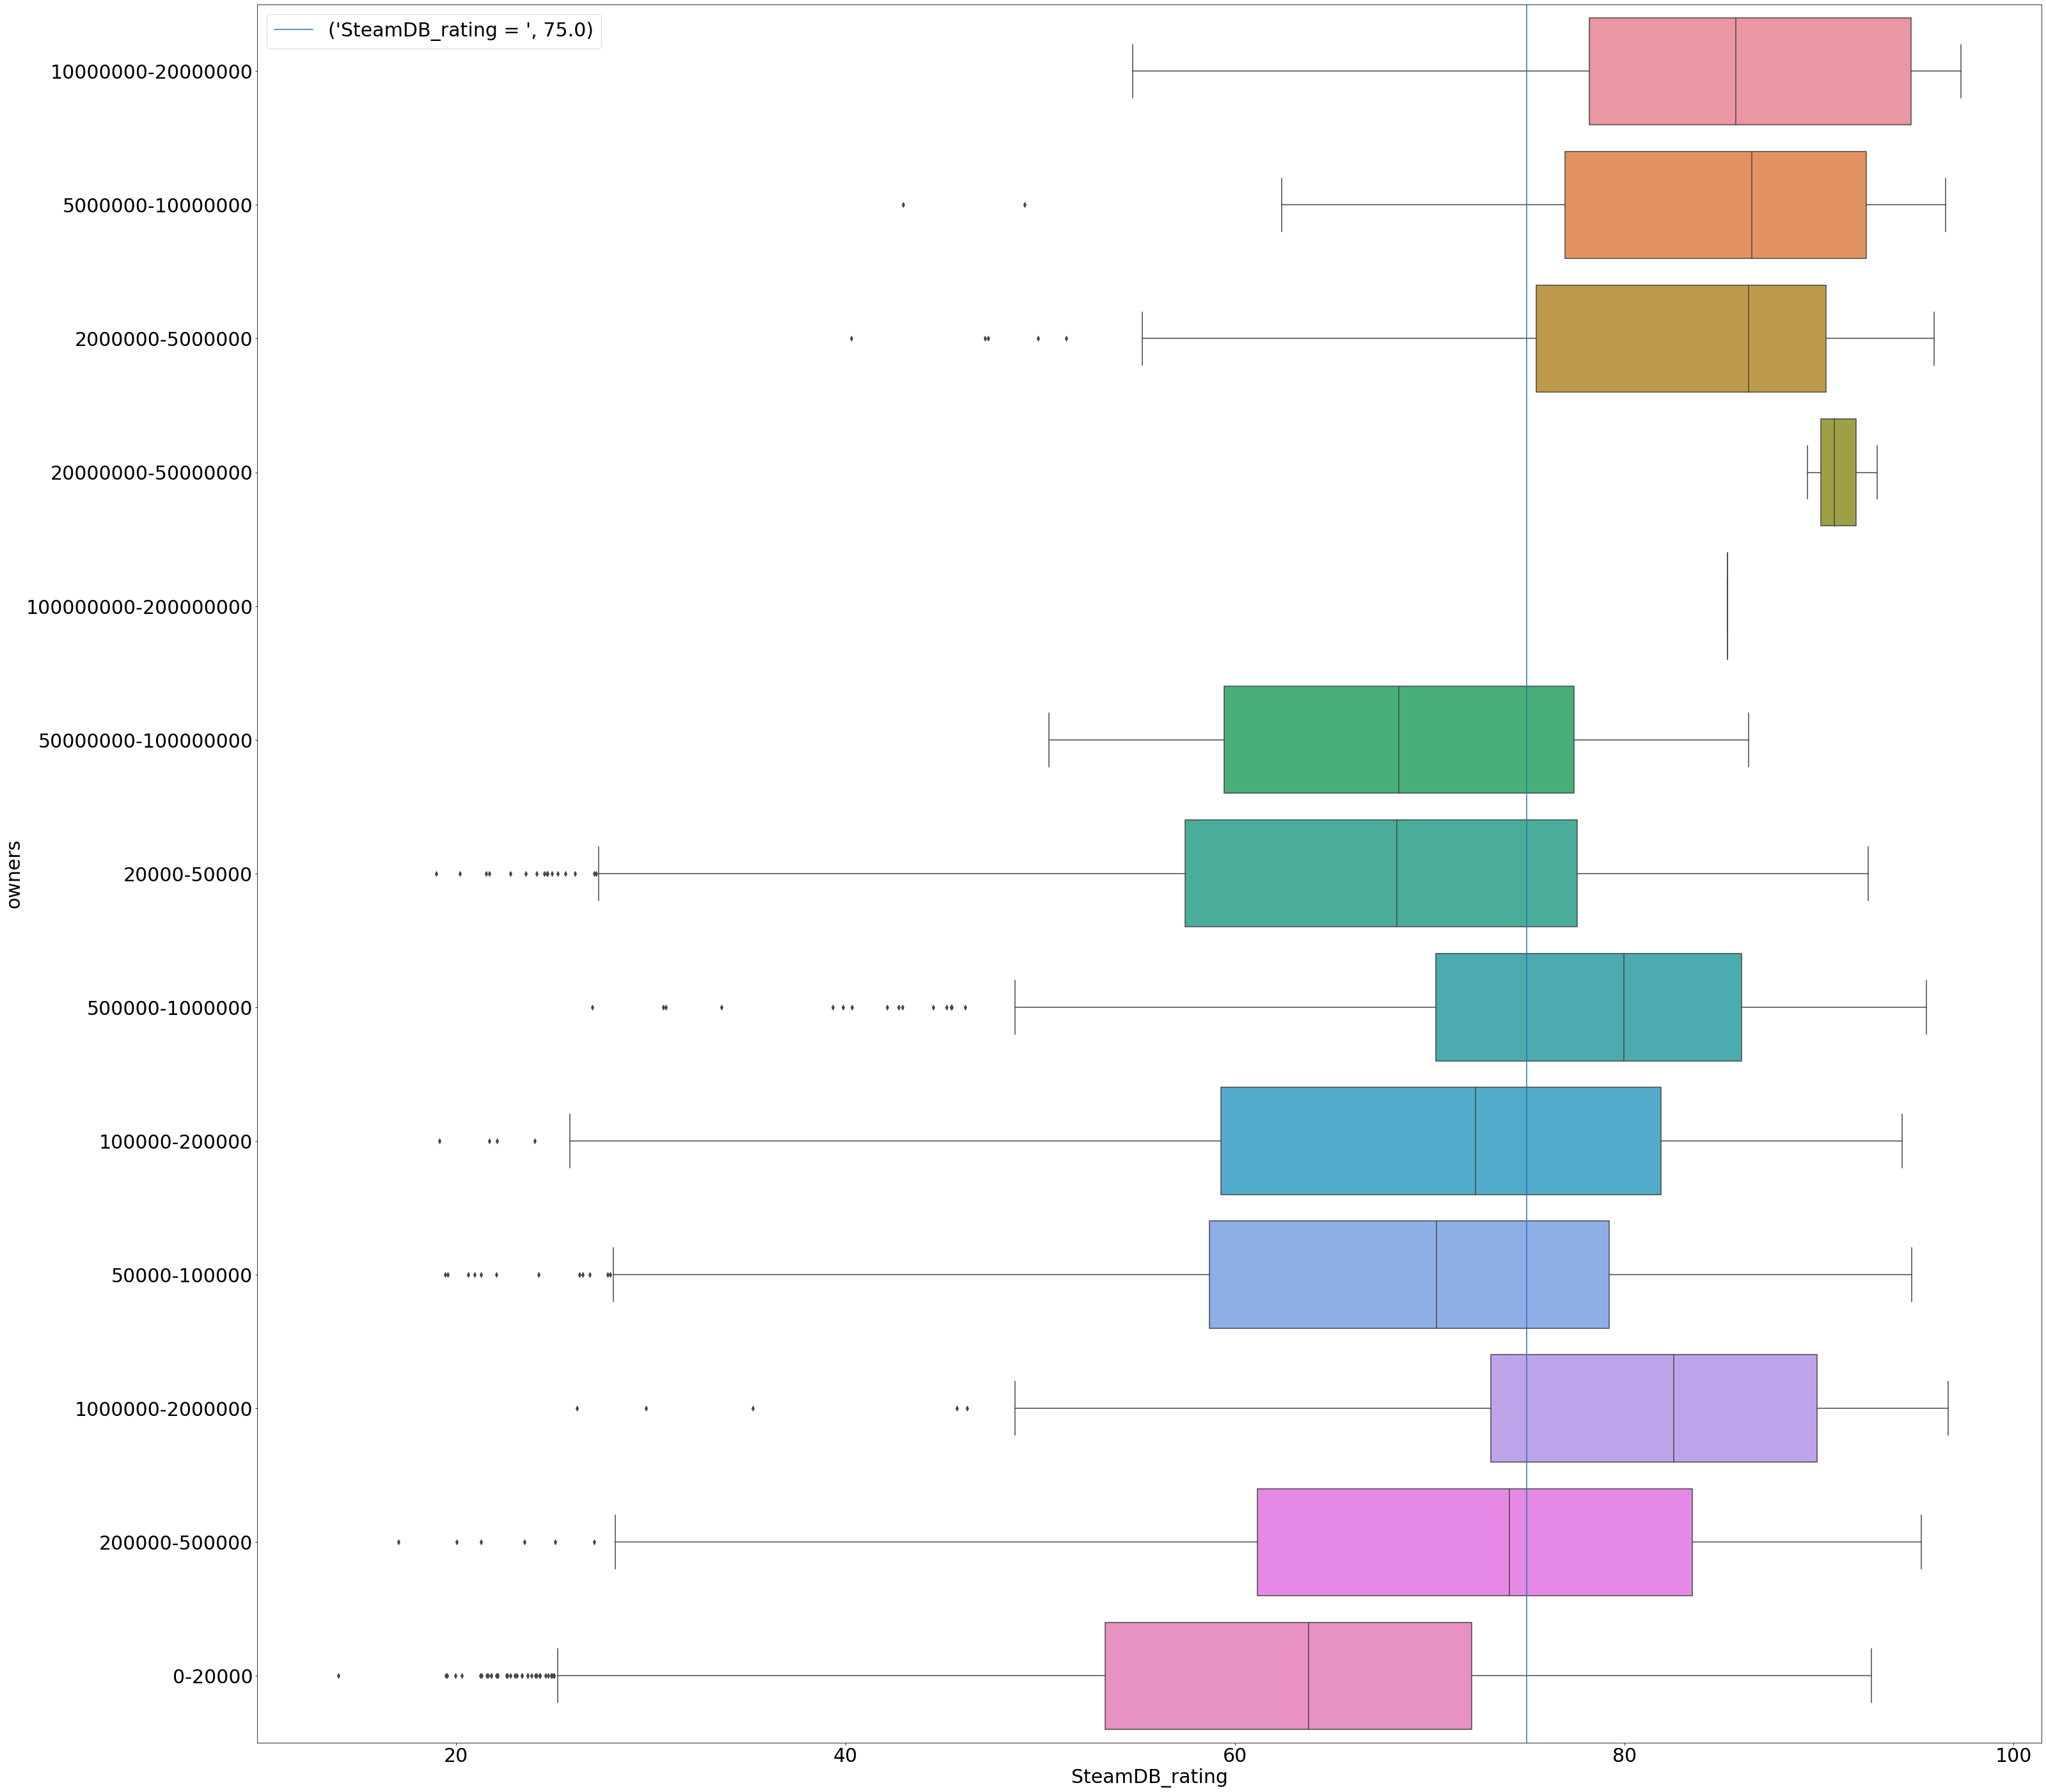

In [52]:
f, ax= plt.subplots(figsize=(50, 50))
sb.boxplot(x = "SteamDB_rating", y ='owners', data = stm, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("SteamDB_rating",fontsize=30)
ax.set_ylabel('owners',fontsize=30)
plt.axvline(steamDB_q3, label= ("SteamDB_rating = ",steamDB_q3))
plt.legend(fontsize=30)

plt.show()

The earlier the year of release, the higher the rating.

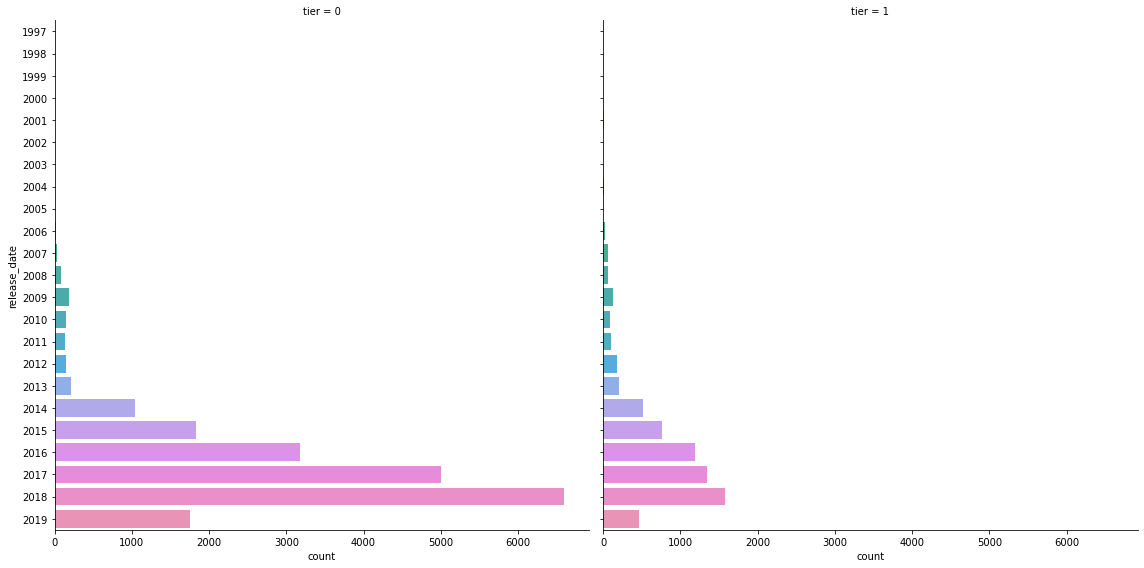

In [53]:
sb.catplot(y = 'release_date', data = stm, col = 'tier', kind = 'count', col_wrap = 2, height = 8)

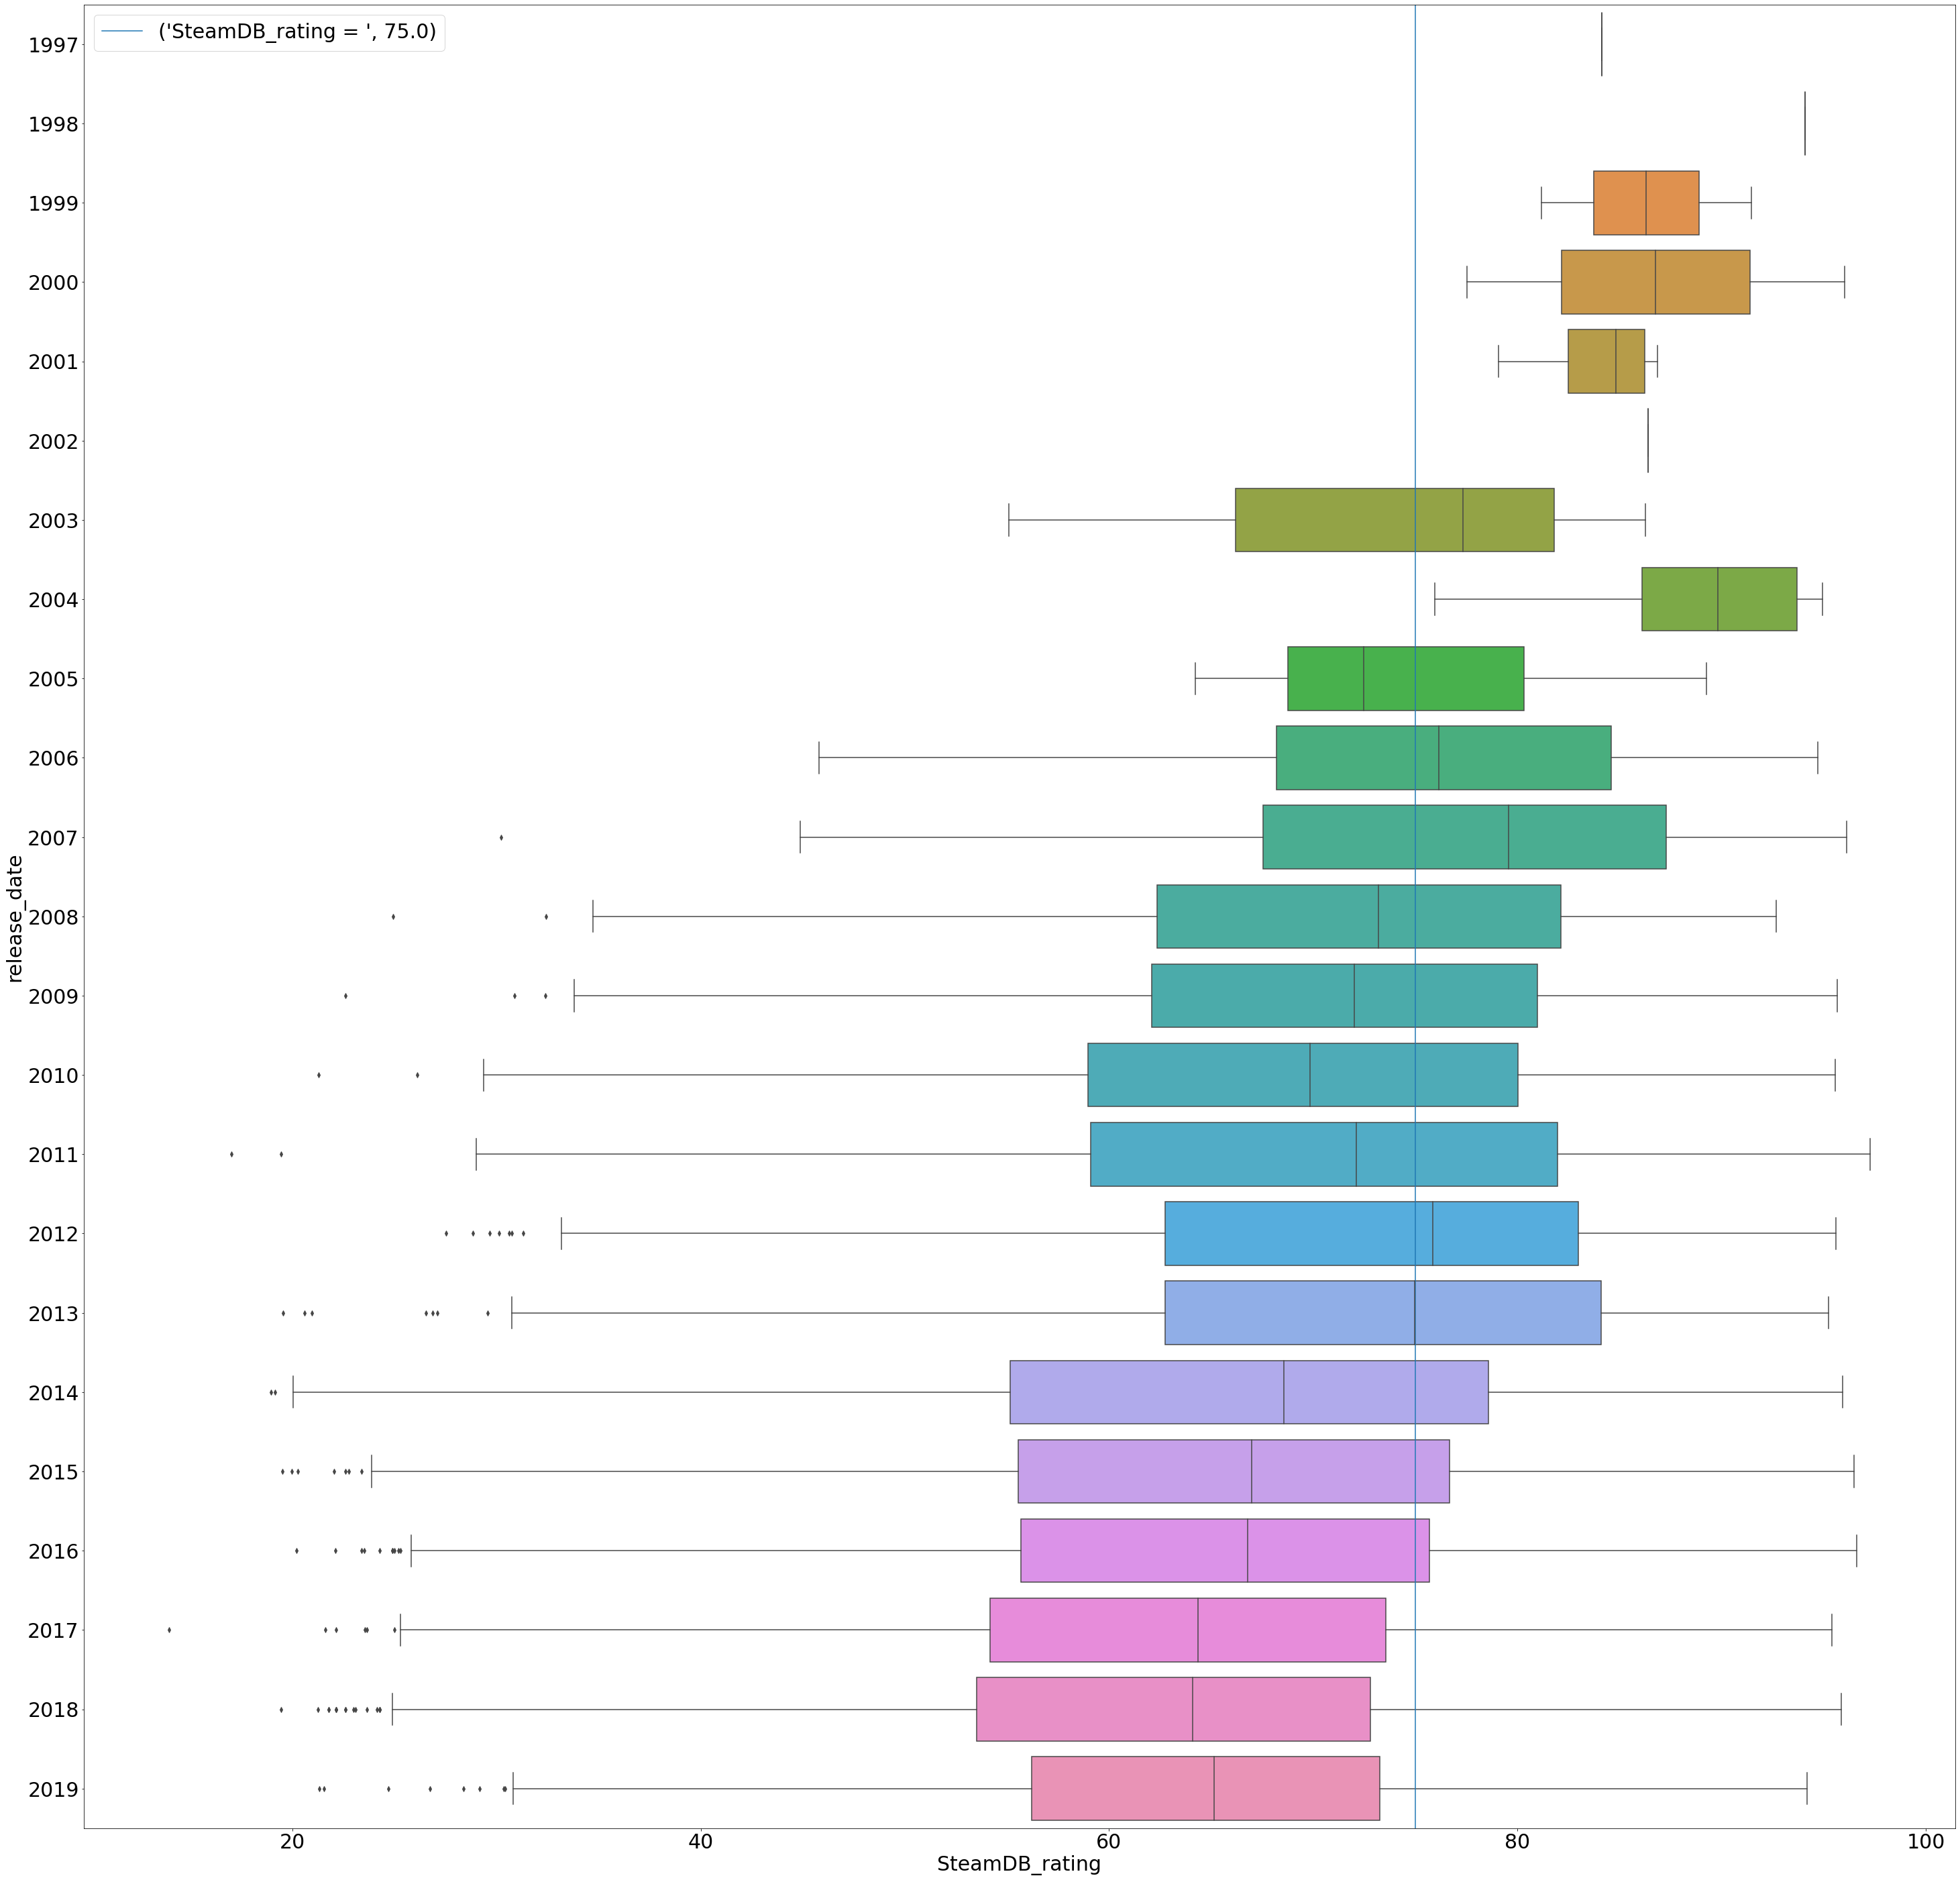

In [54]:
f, ax= plt.subplots(figsize=(50, 50))
sb.boxplot(x = "SteamDB_rating", y ='release_date', data = stm, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("SteamDB_rating",fontsize=30)
ax.set_ylabel('release_date',fontsize=30)
plt.axvline(steamDB_q3, label= ("SteamDB_rating = ",steamDB_q3))
plt.legend(fontsize=30)

plt.show()

The more the owners, the higher the rating.

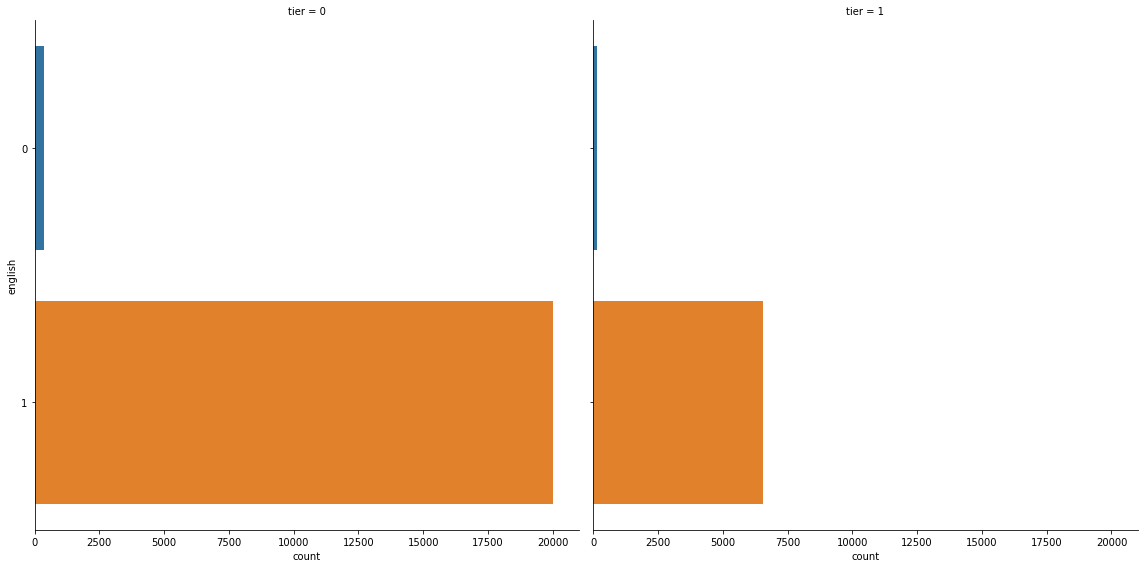

In [55]:
sb.catplot(y = 'english', data = stm, col = 'tier', kind = 'count', col_wrap = 2, height = 8)

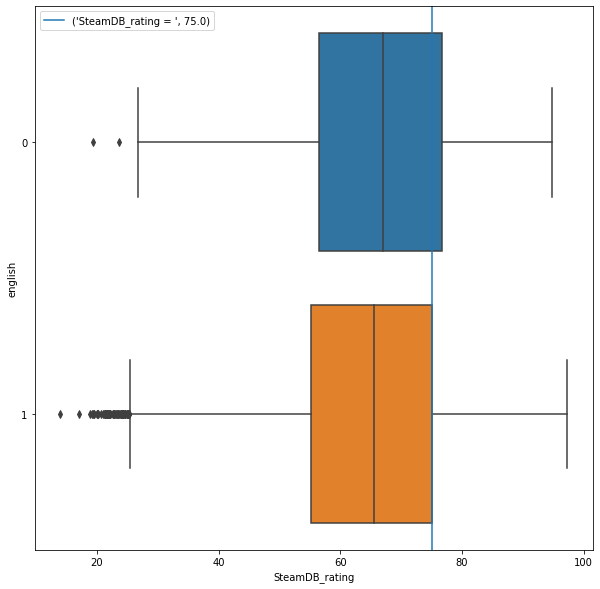

In [56]:
f, ax= plt.subplots(figsize=(10, 10))
sb.boxplot(x = "SteamDB_rating", y ='english', data = stm, orient = "h")
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_xlabel("SteamDB_rating",fontsize=10)
ax.set_ylabel('english',fontsize=10)
plt.axvline(steamDB_q3, label= ("SteamDB_rating = ",steamDB_q3))
plt.legend(fontsize=10)

plt.show()

The relating between 'english' and rating is ambiguous.

### Publisher and Developer

In [57]:
stm['publisher'].value_counts()

Big Fish Games           212
Strategy First           136
Ubisoft                  111
THQ Nordic                98
Square Enix               97
                        ... 
Tonka3D                    1
guyhezi                    1
Robert Gammon              1
Phun Peeticharoenthum      1
SHEN JIAWEI                1
Name: publisher, Length: 14354, dtype: int64

In [58]:
stm['publisher'].describe()

count              27075
unique             14354
top       Big Fish Games
freq                 212
Name: publisher, dtype: object

In [59]:
top_30_freq_pubs = stm['publisher'].value_counts().sort_values(ascending=False).head(30)
top_30_freq_pubs 

Big Fish Games                           212
Strategy First                           136
Ubisoft                                  111
THQ Nordic                                98
Square Enix                               97
Sekai Project                             96
Choice of Games                           94
1C Entertainment                          88
Dagestan Technology                       88
SEGA                                      78
Degica                                    77
Plug In Digital                           72
KISS ltd                                  71
KOEI TECMO GAMES CO., LTD.                71
Slitherine Ltd.                           71
AGM PLAYISM                               69
Artifex Mundi                             67
Buka Entertainment                        66
Devolver Digital                          65
Atriagames                                64
Ripknot Systems                           62
BANDAI NAMCO Entertainment                56
Paradox In

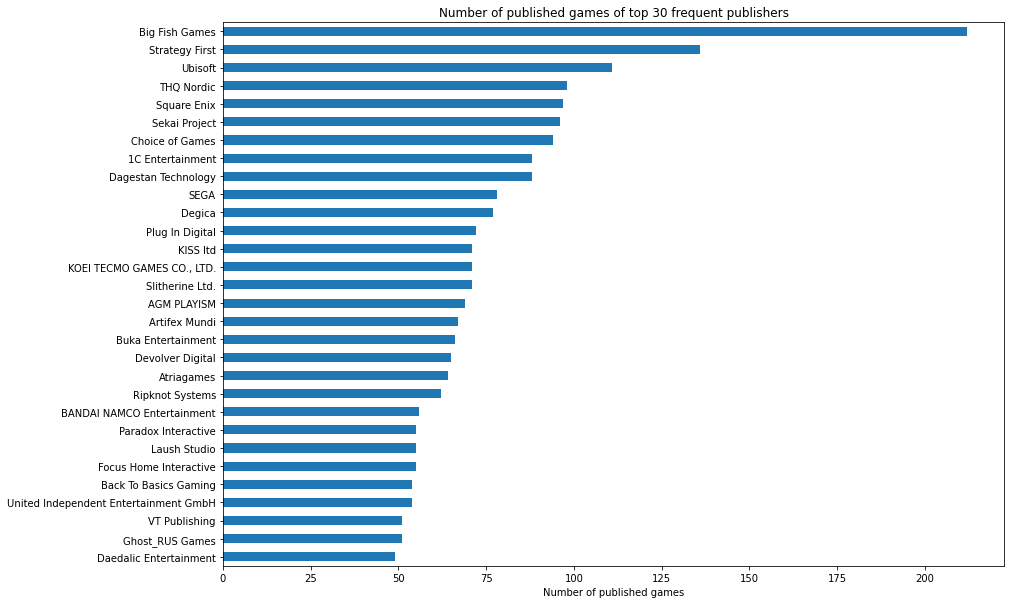

In [60]:
plt.figure(figsize = (14, 10))
pd.Series(top_30_freq_pubs).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Number of published games')
plt.title('Number of published games of top 30 frequent publishers')
plt.show()

In [61]:
pubandrate=pd.concat([stm['publisher'],stm['SteamDB_rating']], axis=1)
pubandrate

,publisher,SteamDB_rating
0,Valve,96.013567
1,Valve,81.170349
2,Valve,86.259763
3,Valve,79.077883
4,Valve,91.454624
...,...,...
27070,SHEN JIAWEI,67.059371
27071,BekkerDev Studio,69.444444
27072,EntwicklerX,40.583635
27073,Alawar Entertainment,64.079515


In [62]:
pubandrate_new = pubandrate.groupby(pubandrate['publisher'])['SteamDB_rating'].mean()
pubandrate_new

publisher
                        69.982135
  Milestone S.r.l.      62.461620
 AFBIK Studio           64.649025
 AYE Technology         34.486765
 Anea_Duo_Dev           52.777778
                          ...    
飞鹰互娱                    71.546927
香港商河洛互動娛樂股份有限公司;方块游戏    57.933961
魂动天下                    67.059371
魔力乐章                    66.616422
수프림                     70.844323
Name: SteamDB_rating, Length: 14354, dtype: float64

In [63]:
top_30_rated_pub=pubandrate_new.astype(float).nlargest(30)
top_30_rated_pub

publisher
Wube Software LTD.                                               96.630243
Ludeon Studios                                                   95.847566
ConcernedApe                                                     95.535628
Team Salvato                                                     95.387628
Kristjan Skutta                                                  95.361847
Gears for Breakfast                                              95.268788
Square Enix;Feral interactive (Mac);Feral Interactive (Linux)    94.988123
Ysbryd Games;AGM PLAYISM                                         94.897869
Holy Priest                                                      94.844861
Steel Crate Games                                                94.511332
tobyfox                                                          94.190933
Mega Crit Games                                                  94.182857
Monomi Park                                                      93.980726
Studio MDHR Ent

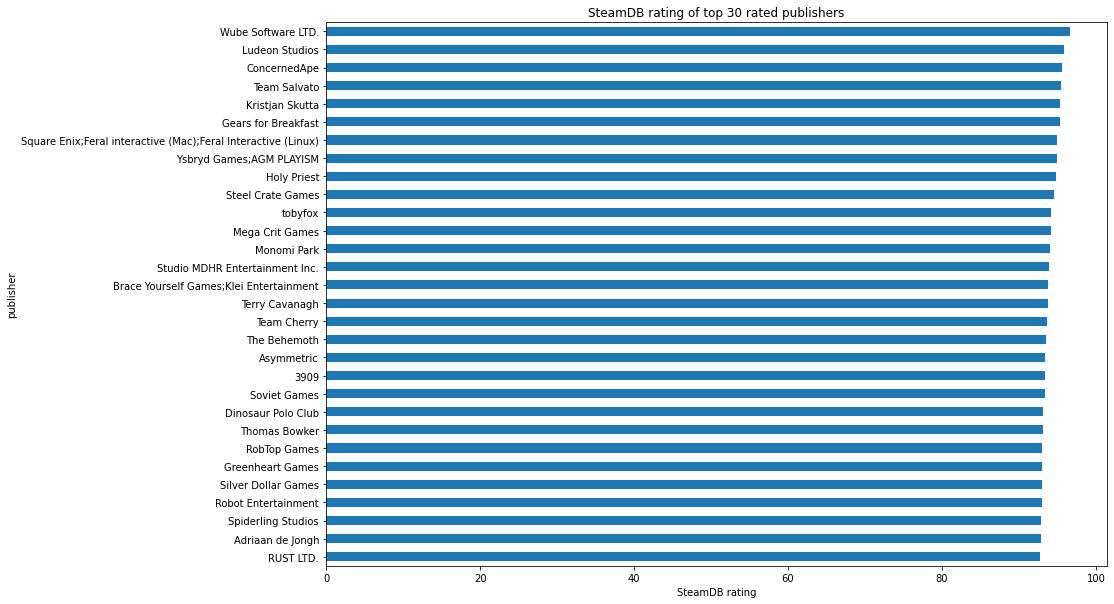

In [64]:
plt.figure(figsize = (14, 10))
pd.Series(top_30_rated_pub).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('SteamDB rating')
plt.title('SteamDB rating of top 30 rated publishers')
plt.show()

In [65]:
stm['developer'].value_counts()

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
                              ..
CRAPPY ZOMBIE GAME STUDIO      1
Ramon Mujica                   1
Oomst Games                    1
Joe Censored Games             1
Adept Studios GD               1
Name: developer, Length: 17113, dtype: int64

In [66]:
stm['developer'].describe()

count               27075
unique              17113
top       Choice of Games
freq                   94
Name: developer, dtype: object

In [67]:
devandrate=pd.concat([stm['developer'],stm['SteamDB_rating']], axis=1)
devandrate

,developer,SteamDB_rating
0,Valve,96.013567
1,Valve,81.170349
2,Valve,86.259763
3,Valve,79.077883
4,Gearbox Software,91.454624
...,...,...
27070,SHEN JIAWEI,67.059371
27071,Semyon Maximov,69.444444
27072,EntwicklerX,40.583635
27073,Yustas Game Studio,64.079515


In [68]:
devandrate_new = pubandrate.groupby(devandrate['developer'])['SteamDB_rating'].mean()
devandrate_new

developer
#workshop                     89.333865
'What Day is it?' Games       64.079515
(STCG) Smoker The Car Game    50.000000
+7 Software                   76.851433
+Mpact Games, LLC.            73.934689
                                ...    
魂动天下                          67.059371
魔力乐章                          66.616422
魔术工坊                          72.059250
黄昏フロンティア                      82.806037
수프림                           70.844323
Name: SteamDB_rating, Length: 17113, dtype: float64

In [69]:
top_30_rated_devs=devandrate_new.astype(float).nlargest(30)
top_30_rated_devs

developer
Wube Software LTD.                                                                   96.630243
Re-Logic                                                                             95.941586
Ludeon Studios                                                                       95.847566
ConcernedApe                                                                         95.535628
Team Salvato                                                                         95.387628
Kristjan Skutta                                                                      95.361847
Gears for Breakfast                                                                  95.268788
Little Cat Feet                                                                      95.135468
DONTNOD Entertainment;Feral Interactive (Mac);Feral Interactive (Linux)              94.988123
Sukeban Games                                                                        94.897869
Holy Priest                             

In [70]:
top_30_freq_devs = stm['developer'].value_counts().sort_values(ascending=False).head(30)
top_30_freq_devs 

Choice of Games                          94
KOEI TECMO GAMES CO., LTD.               72
Ripknot Systems                          62
Laush Dmitriy Sergeevich                 51
Nikita "Ghost_RUS"                       50
Dexion Games                             45
RewindApp                                43
Hosted Games                             42
Blender Games                            40
For Kids                                 36
Humongous Entertainment                  36
EnsenaSoft                               35
Eipix Entertainment                      32
Nekyau Games                             32
Warfare Studios                          31
HeR Interactive                          30
MumboJumbo                               29
ERS G Studios                            28
Creobit                                  28
HexWar Games                             27
Valve                                    26
Sly                                      26
Square Enix                     

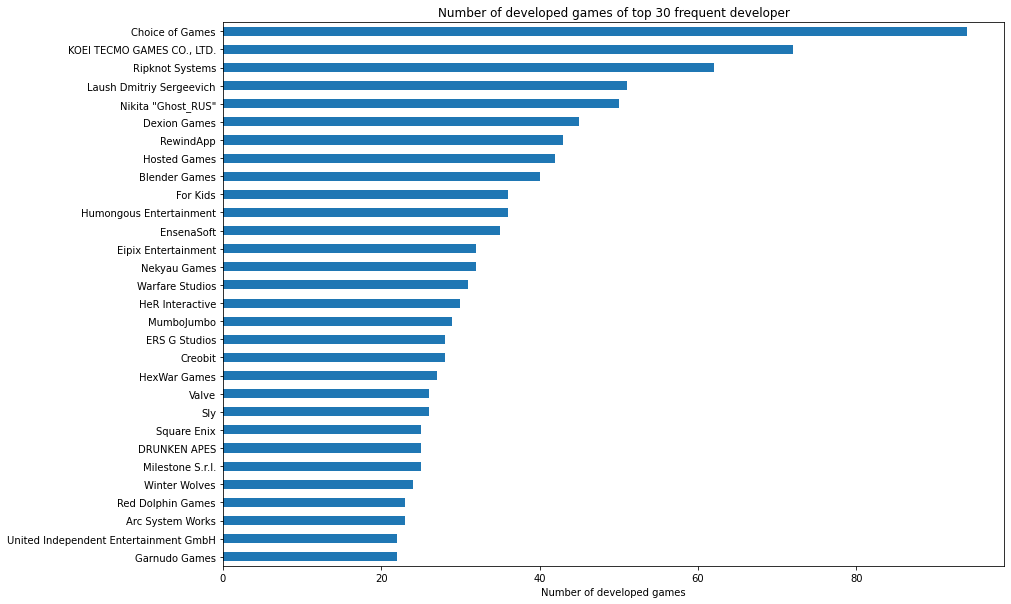

In [71]:
plt.figure(figsize = (14, 10))
pd.Series(top_30_freq_devs).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Number of developed games')
plt.title('Number of developed games of top 30 frequent developer')
plt.show()

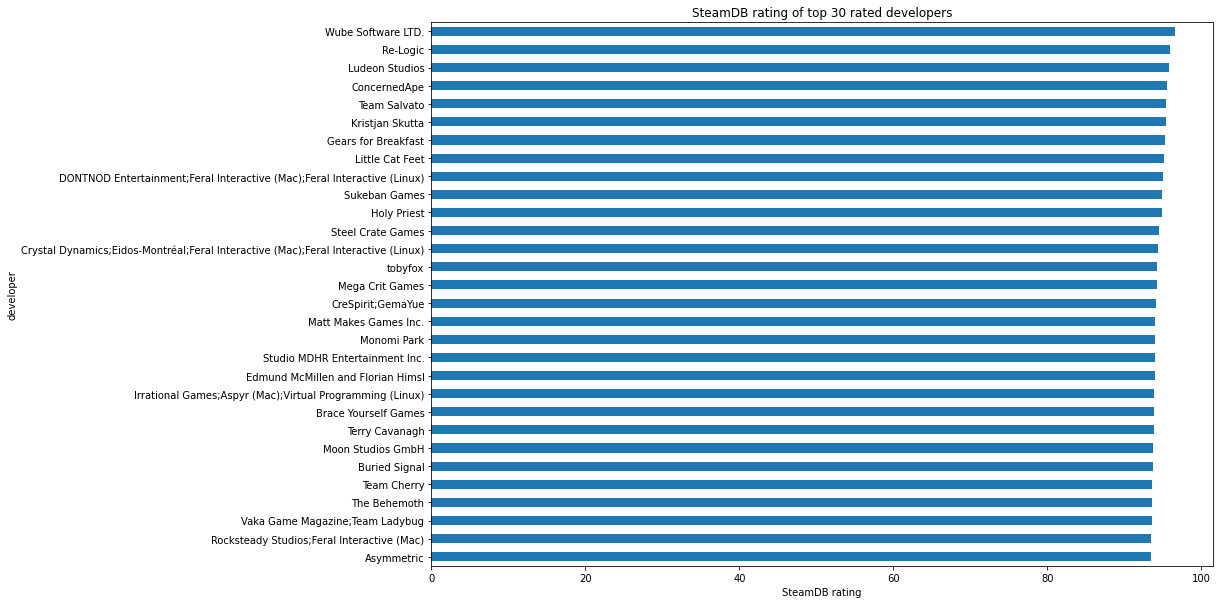

In [72]:
plt.figure(figsize = (14, 10))
pd.Series(top_30_rated_devs).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('SteamDB rating')
plt.title('SteamDB rating of top 30 rated developers')
plt.show()

# Multivariate visualization

### Correlation among numerical values

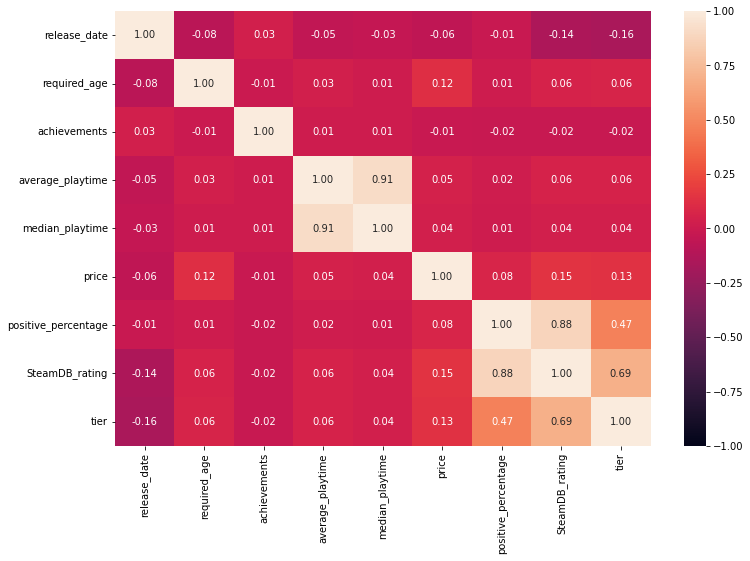

In [73]:
corr=stm.drop(columns=['appid','positive_ratings','negative_ratings','english']).corr()
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(corr, vmin = -1, vmax = 1, annot = True, fmt = ".2f")

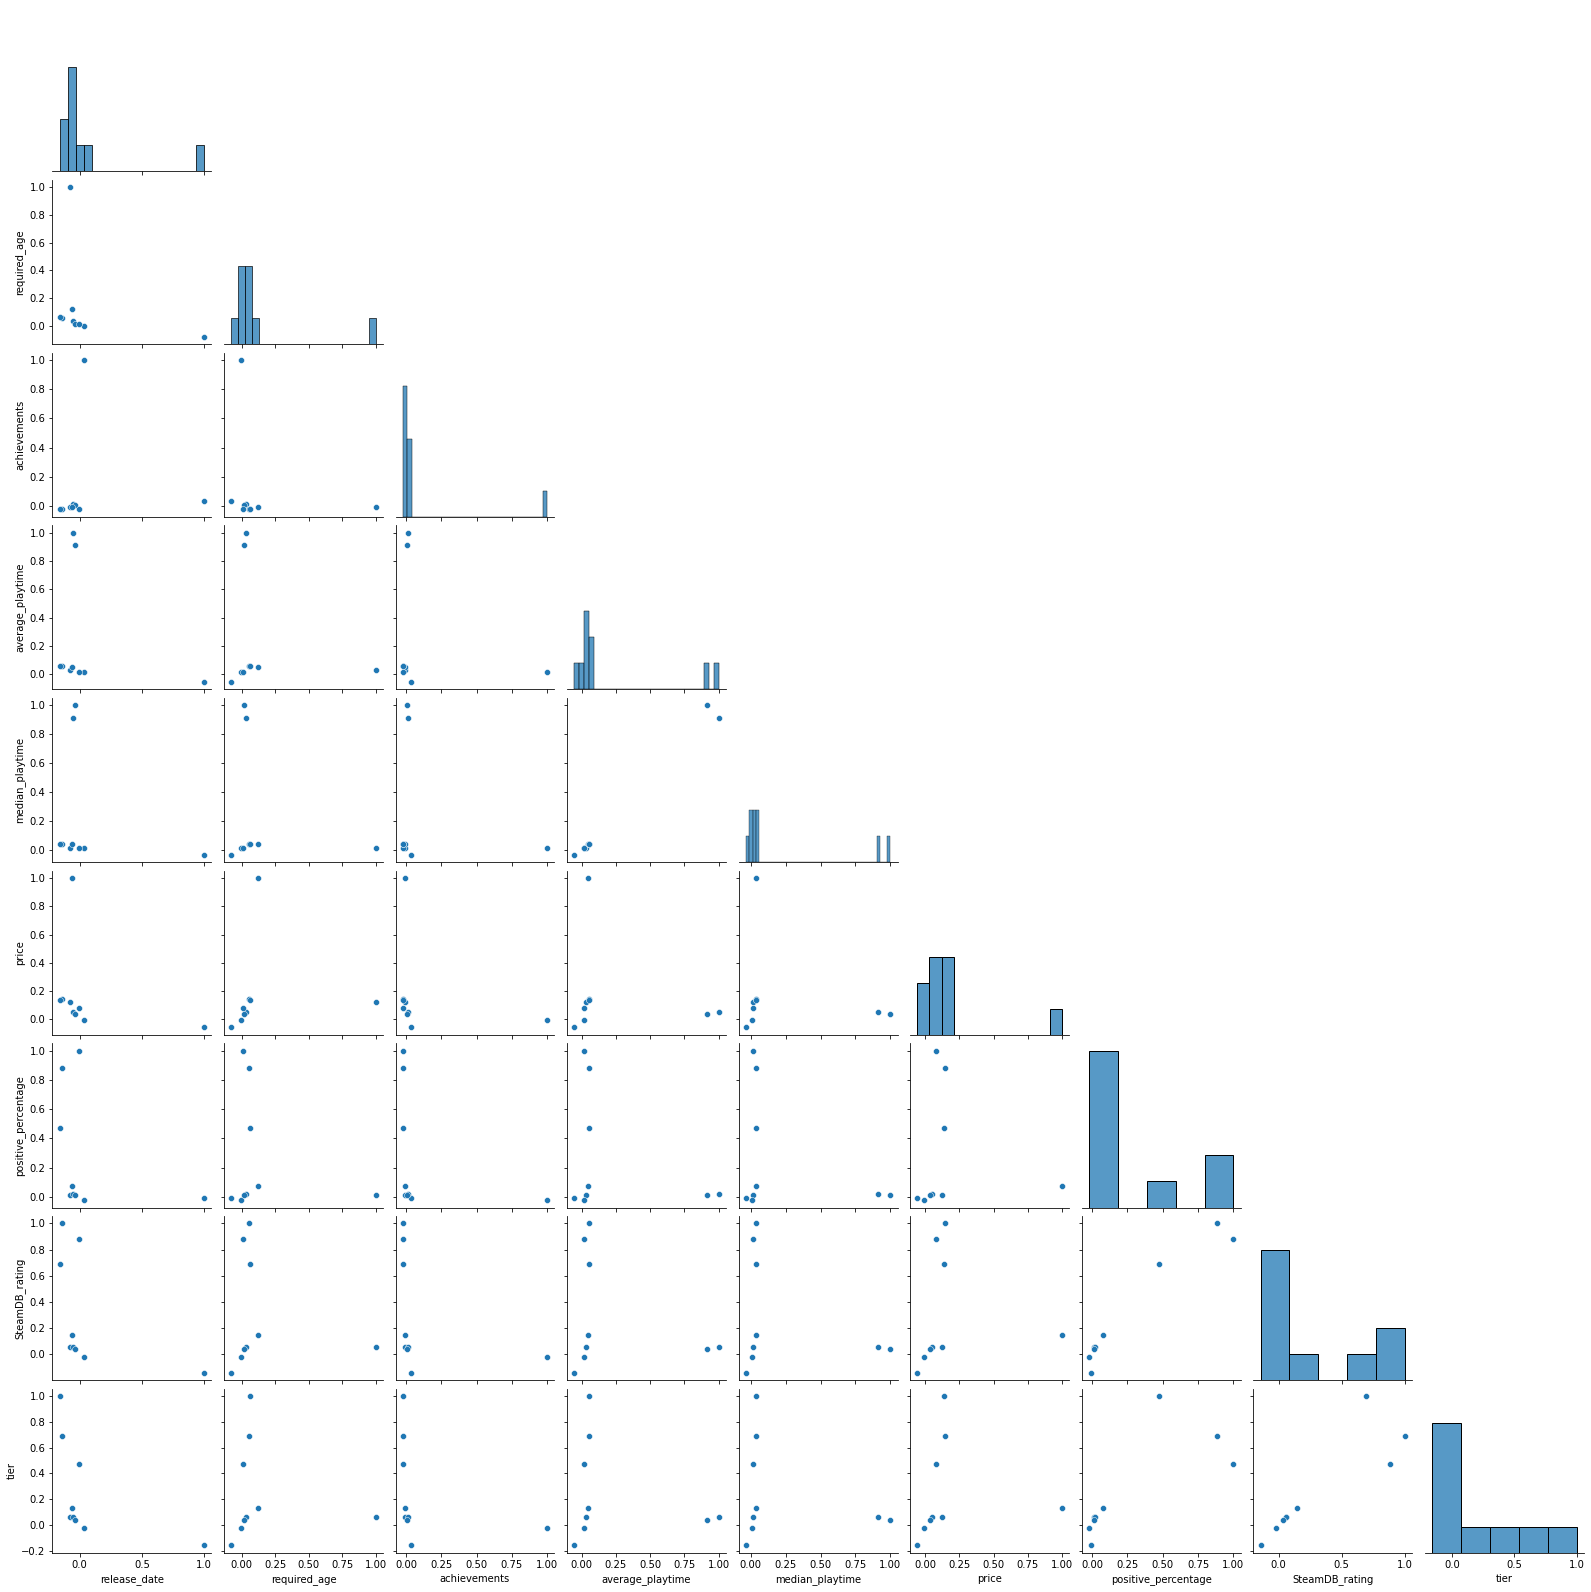

In [74]:
sb.pairplot(data =corr, corner = True)

we found that one factor that has relatively strong correlation with playtime: release_date and price

we found that one factor that has relatively strong correlation with tier: playtime

# SENTIMENT ANALYSIS

Sentiment analysis helps us extract, score, classify and visualize the feelings and opinions that app users display in their reviews of the apps. We will be analysing the sentiment for the top app. The top app is determined by SteamDB Rating. But before that we will be cleaning the review texts to prepare them for sentiment analysis

### Identifying the top 10 games based on Steam DB Rating

In [75]:
top10 = stm.sort_values(by='SteamDB_rating', ascending=False)[:10]
top10 = top10[["appid", "name", "SteamDB_rating"]]
top10

,appid,name,SteamDB_rating
23,620,Portal 2,97.276812
7577,427520,Factorio,96.630243
2964,292030,The Witcher® 3: Wild Hunt,96.494325
17,400,Portal,96.142160
0,10,Counter-Strike,96.013567
1120,105600,Terraria,95.941586
1962,250900,The Binding of Isaac: Rebirth,95.913805
3036,294100,RimWorld,95.847566
21,550,Left 4 Dead 2,95.669046
1596,227300,Euro Truck Simulator 2,95.589549


This is the list of top 10 highest rated games in the store. It can be seen that Portal2 is the highest rated game in the store. Therefore we will be doing sentiment analysis on the reviews given by users.

#### Extracting reviews for portal2 (appid = 620) from another dataset

In [76]:
review_data = pd.read_csv("dataset.csv")
portal2 = review_data.query("app_id==620")
portal2.head()

,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0


### Data Preprocessing

First, we remove stopwords which are very commonly used articles and words in English. Then we place the new list of words into a new 'processed_review' column

In [77]:
#Removing stopwords and placing the new list of words into a new 'processed review' column

#create empty list
processedreview = []

# Combines words with similar meaning together
stemmer = PorterStemmer()

# Removes words like "it", "an", etc.
sw = stopwords.words("english")

for i in portal2["review_text"]:
    i = str(i)
    if i == 'nan':
        i = 'blank'
    text = i.lower()
    words = word_tokenize(i)
    words = [word for word in words if word not in sw]
    words = [stemmer.stem(word) for word in words]
    words = [w for w in words if len(w) > 3]
    words = ' '.join(str(word) for word in words)
    processedreview.append(words)

portal2['processed_review'] = processedreview
portal2

,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes,processed_review
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1,best game ever made valv great stori beauti di...
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0,step game step play game step smart step beat ...
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0,pleas valv learn count past
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0,much experi game littl time spend play great g...
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0,brilliant game ever made gameplay humor charac...
...,...,...,...,...,...,...,...
38919,6164766,620,Portal 2,If you don't have this game I'm not sure what ...,1,0,game sure life
38920,6164767,620,Portal 2,"great game to play with friends, and to mess w...",1,0,great game play friend mess though singl playe...
38921,6164768,620,Portal 2,Very fun co-op to play with friends,1,0,veri co-op play friend
38922,6164769,620,Portal 2,"Great story, and i love when i play with friends",1,0,great stori love play friend


## Positive word count
We will be extracting the most common words in reviews with the game being recommended. We will display the Frequency bar graph to visualise the top words in processed reviews

In [78]:
portal2['review_text'].isnull().sum()

128

There are 128 empty reviews values. We will remove them.

In [79]:
#dropping empty rows
portal2 = portal2.dropna(axis=0, subset=['review_text'])

In [80]:
#check if removed
portal2['review_text'].isnull().sum()

0

<BarContainer object of 30 artists>

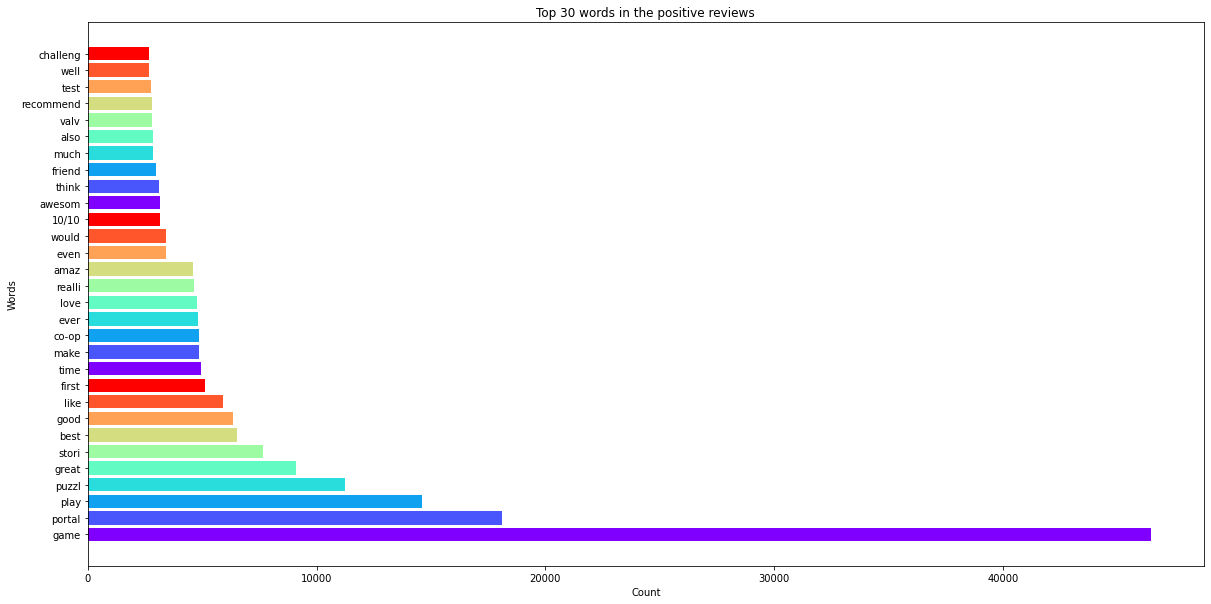

In [81]:
all_reviews = ' '.join(portal2['processed_review'][portal2['review_score']==1].str.lower())
filtered_words = [word for word in all_reviews.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(30):
    words.append(letter)
    counts.append(count)

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top 30 words in the positive reviews')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [82]:
topwords = words
print(topwords)

['game', 'portal', 'play', 'puzzl', 'great', 'stori', 'best', 'good', 'like', 'first', 'time', 'make', 'co-op', 'ever', 'love', 'realli', 'amaz', 'even', 'would', '10/10', 'awesom', 'think', 'friend', 'much', 'also', 'valv', 'recommend', 'test', 'well', 'challeng']


This is the list of the top 30 words in the reviews excluding common English words

In [83]:
listb = [] # number of keywords from topwords list found in each row of 'processed review' will be appended to list b
for words in portal2['processed_review']:
    words = word_tokenize(words)
    listb.append(len([word for word in words if word in topwords]))
    
portal2["positive_review_count"] = listb
portal2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes,processed_review,positive_review_count
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1,best game ever made valv great stori beauti di...,12
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0,step game step play game step smart step beat ...,8
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0,pleas valv learn count past,1
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0,much experi game littl time spend play great g...,7
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0,brilliant game ever made gameplay humor charac...,6


## Percentage positive word count

In [84]:
#counting total number of words in every review text (separated by spaces)
words=[]
for index, row in portal2.iterrows():
    numw=1
    for x in str(row['review_text']):
        if x==' ':
            numw+=1
    words.append(numw)
portal2['word_count']=words
portal2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes,processed_review,positive_review_count,word_count
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1,best game ever made valv great stori beauti di...,12,41
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0,step game step play game step smart step beat ...,8,41
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0,pleas valv learn count past,1,7
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0,much experi game littl time spend play great g...,7,29
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0,brilliant game ever made gameplay humor charac...,6,42


In [85]:
#percentage of positive words for each review
percentage=[]
for index, row in portal2.iterrows():
    percent= (int(row['positive_review_count'])/int(row['word_count']))*100
    percentage.append(percent)
portal2['percentage of positive review words(%)']=percentage
portal2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes,processed_review,positive_review_count,word_count,percentage of positive review words(%)
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1,best game ever made valv great stori beauti di...,12,41,29.268293
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0,step game step play game step smart step beat ...,8,41,19.512195
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0,pleas valv learn count past,1,7,14.285714
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0,much experi game littl time spend play great g...,7,29,24.137931
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0,brilliant game ever made gameplay humor charac...,6,42,14.285714


###### Using VADER (Valence Aware Dictionary and Sentiment Reasoner), which is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [86]:
SIA = SentimentIntensityAnalyzer()

#review sentiment
portal2["processed_review"]= portal2["processed_review"].astype(str)
portal2['Review Polarity Score']=portal2["processed_review"].apply(lambda x:SIA.polarity_scores(x)['compound'])

portal2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,app_id,app_name,review_text,review_score,review_votes,processed_review,positive_review_count,word_count,percentage of positive review words(%),Review Polarity Score
0,6125847,620,Portal 2,"The best game ever made by Valve. Great story,...",1,1,best game ever made valv great stori beauti di...,12,41,29.268293,0.9799
1,6125848,620,Portal 2,Step 1: Get game Step 2: Play game Step 3: Be ...,1,0,step game step play game step smart step beat ...,8,41,19.512195,0.7579
2,6125849,620,Portal 2,"Please Valve, Learn to count past 2",1,0,pleas valv learn count past,1,7,14.285714,0.0000
3,6125850,620,Portal 2,"Don't have much experience in this game, but w...",1,0,much experi game littl time spend play great g...,7,29,24.137931,0.7579
4,6125851,620,Portal 2,One of the most brilliant games ever made. The...,1,0,brilliant game ever made gameplay humor charac...,6,42,14.285714,0.8225


# Classification

Extract rows with valid rating and average playtime
We found that some of the games were unplayed after purchase, so we decided to extract rows with valid rating and average playtime.

In [87]:
stmFilter=stm.loc[((stm['positive_ratings'] + stm['negative_ratings'])>50) & ((stm['average_playtime'])>0)]
stmFilter=stmFilter.reset_index()
stmFilter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5594 entries, 0 to 5593
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5594 non-null   int64  
 1   appid                5594 non-null   int64  
 2   name                 5594 non-null   object 
 3   release_date         5594 non-null   int64  
 4   english              5594 non-null   int64  
 5   developer            5594 non-null   object 
 6   publisher            5594 non-null   object 
 7   platforms            5594 non-null   object 
 8   required_age         5594 non-null   int64  
 9   categories           5594 non-null   object 
 10  genres               5594 non-null   object 
 11  steamspy_tags        5594 non-null   object 
 12  achievements         5594 non-null   int64  
 13  positive_ratings     5594 non-null   int64  
 14  negative_ratings     5594 non-null   int64  
 15  average_playtime     5594 non-null   f

In [88]:
stmFilter.head()

,index,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,positive_percentage,SteamDB_rating,tier,most_voted_tag
0,0,10,Counter-Strike,2000,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",...,124534,3339,0.092391,0.001663,10000000-20000000,7.19,0.973888,96.013567,1,action
1,1,20,Team Fortress Classic,1999,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",...,3318,633,0.001453,0.000325,5000000-10000000,3.99,0.839787,81.170349,1,action
2,2,30,Day of Defeat,2003,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Valve Anti-Cheat enabled]",...,3416,398,0.000981,0.000178,5000000-10000000,3.99,0.895648,86.259763,1,action
3,3,40,Deathmatch Classic,2001,1,Valve,Valve,"[windows, mac, linux]",0,"[Multi-player, Online Multi-Player, Local Mult...",...,1273,267,0.001353,0.000965,5000000-10000000,3.99,0.826623,79.077883,1,action
4,4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,"[windows, mac, linux]",0,"[Single-player, Multi-player, Valve Anti-Cheat...",...,5250,288,0.003273,0.002177,5000000-10000000,3.99,0.947996,91.454624,1,action


### Encoding developer

In [89]:
stmDev=stmFilter[['developer','tier']].copy()
stmDev['developer_values']=pd.Series(dtype='int')
stmDev['developer'].value_counts()

Valve                                     26
EnsenaSoft                                25
Square Enix                               17
Daedalic Entertainment                    17
Winged Cloud                              17
                                          ..
Gameguyz                                   1
Tazigen Clock                              1
Kylotonn                                   1
Exe Games Inc.                             1
Beijing Litchi Culture Media Co., Ltd.     1
Name: developer, Length: 3723, dtype: int64

In [90]:
labelencoder = LabelEncoder()
stmDev['developer_values']=labelencoder.fit_transform(stmDev['developer'])
stmDev=stmDev.reset_index()
stmFilter['developer_values']=stmDev['developer_values']

### Encoding most_voted_tag

In [91]:
stmTag=stmFilter[['most_voted_tag','tier']].copy()
stmTag['most_voted_tag_values']=pd.Series(dtype='int')
stmTag['most_voted_tag'].value_counts()

action                   1248
indie                     947
adventure                 631
free_to_play              580
strategy                  538
casual                    485
rpg                       410
simulation                299
racing                    121
sexual_content             68
nudity                     65
sports                     53
massively_multiplayer      41
gore                       36
early_access               32
utilities                  11
design_&_illustration       6
game_development            5
violent                     5
education                   4
animation_&_modeling        3
audio_production            3
video_production            2
documentary                 1
Name: most_voted_tag, dtype: int64

Some tags have very low frequency, so we combine those tags with <50 entries into "others"

In [92]:
stmTag.loc[stmTag['most_voted_tag'] == 'utilities', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'design_&_illustration', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'game_development', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'violent', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'education', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'animation_&_modeling', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'audio_production', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'video_production', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'early_access', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'gore', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'massively_multiplayer', 'most_voted_tag']='others'
stmTag.loc[stmTag['most_voted_tag'] == 'documentary', 'most_voted_tag']='others'

stmTag['most_voted_tag'].value_counts()

action            1248
indie              947
adventure          631
free_to_play       580
strategy           538
casual             485
rpg                410
simulation         299
others             149
racing             121
sexual_content      68
nudity              65
sports              53
Name: most_voted_tag, dtype: int64

In [93]:
labelencoder = LabelEncoder()
stmTag['most_voted_tag_values']=labelencoder.fit_transform(stmTag['most_voted_tag'])
stmTag=stmTag.reset_index()
stmFilter['most_voted_tag_values']=stmTag['most_voted_tag_values']
stmTag

,index,most_voted_tag,tier,most_voted_tag_values
0,0,action,1,0
1,1,action,1,0
2,2,action,1,0
3,3,action,1,0
4,4,action,1,0
...,...,...,...,...
5589,5589,others,0,6
5590,5590,others,1,6
5591,5591,indie,1,4
5592,5592,casual,1,2


In [94]:
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

{'action': 0, 'adventure': 1, 'casual': 2, 'free_to_play': 3, 'indie': 4, 'nudity': 5, 'others': 6, 'racing': 7, 'rpg': 8, 'sexual_content': 9, 'simulation': 10, 'sports': 11, 'strategy': 12}


### Decision Tree

#### Bi-variate

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6183551847437425

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5561115082201572



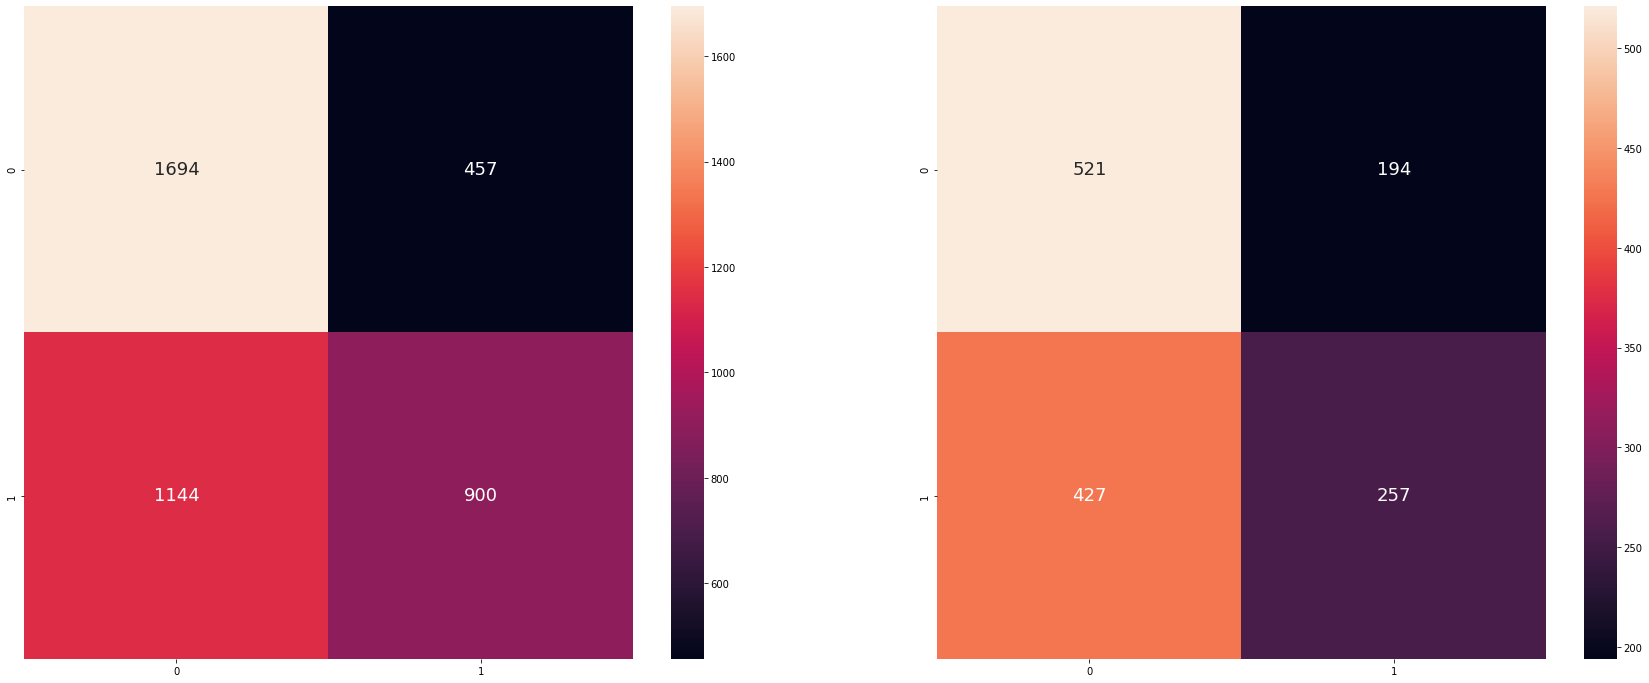

In [95]:
predictors = ['median_playtime']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6271752085816448

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6261615439599714



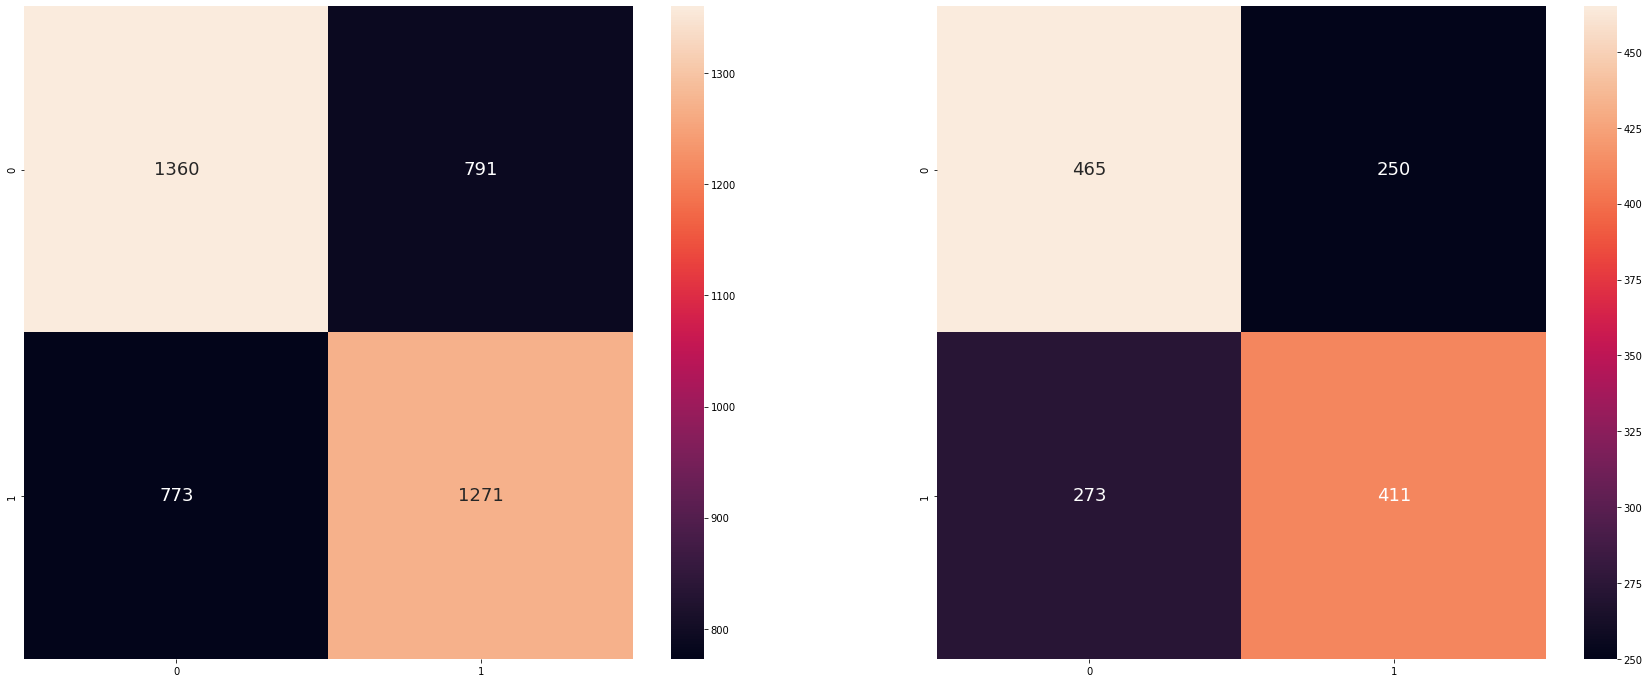

In [96]:
predictors = ['price']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Multi-variate

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.700119189511323

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6190135811293781



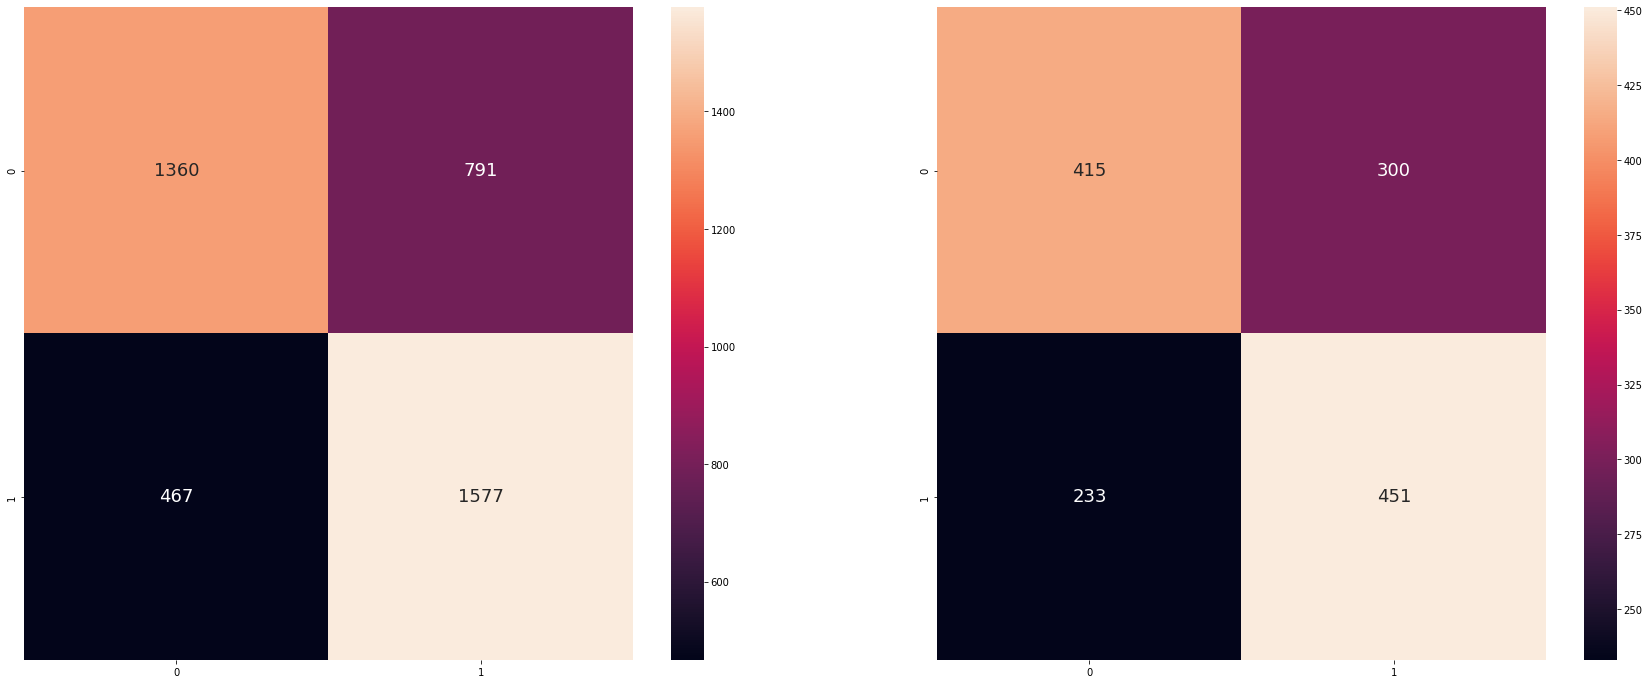

In [97]:
predictors = ['median_playtime', 'price','achievements','english','required_age','release_date','most_voted_tag_values','developer_values']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Random Forest

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7239570917759237

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.63831308077198



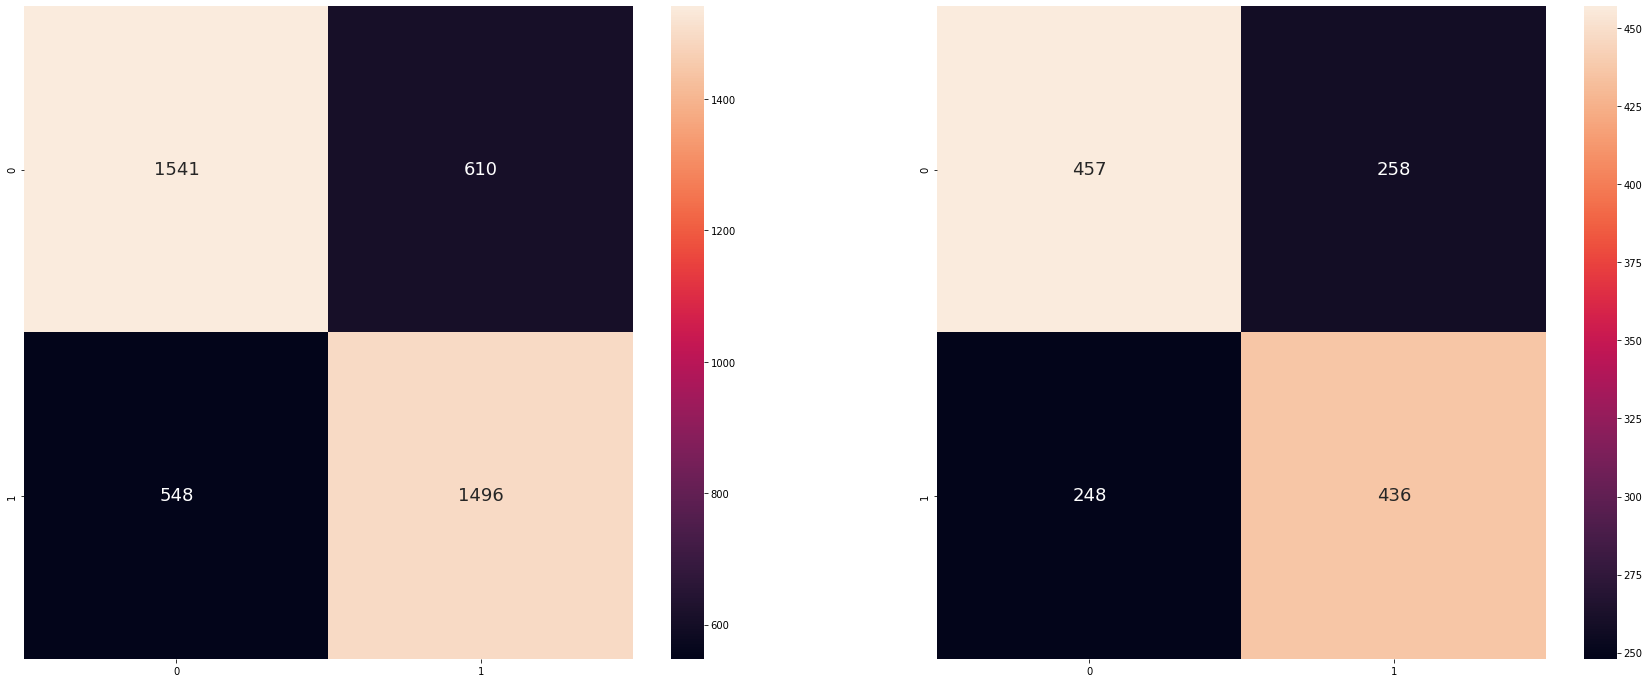

In [98]:
predictors = ['median_playtime', 'price','achievements','english','required_age','release_date','most_voted_tag_values','developer_values']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Random Forest using Train Data
rf = RandomForestClassifier(n_estimators = 100, max_depth = 7)  # create the object
rf.fit(X_train, y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()
rfscore = rf.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [99]:
## Calculating feature importance
feature_importance = pd.DataFrame(rf.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending = False)
print(feature_importance)

                       importance
price                    0.275162
median_playtime          0.224795
achievements             0.166179
release_date             0.118455
developer_values         0.117819
most_voted_tag_values    0.077801
required_age             0.015471
english                  0.004317


Grid search to optimize parameters

In [103]:
n_estimators = [100, 150, 200, 250]
max_depth = [5, 6, 7, 8, 9]
min_samples_split = [3, 4, 5, 6, 7]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train.values.ravel())
bestF.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 100}

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7892729439809297

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6354538956397426



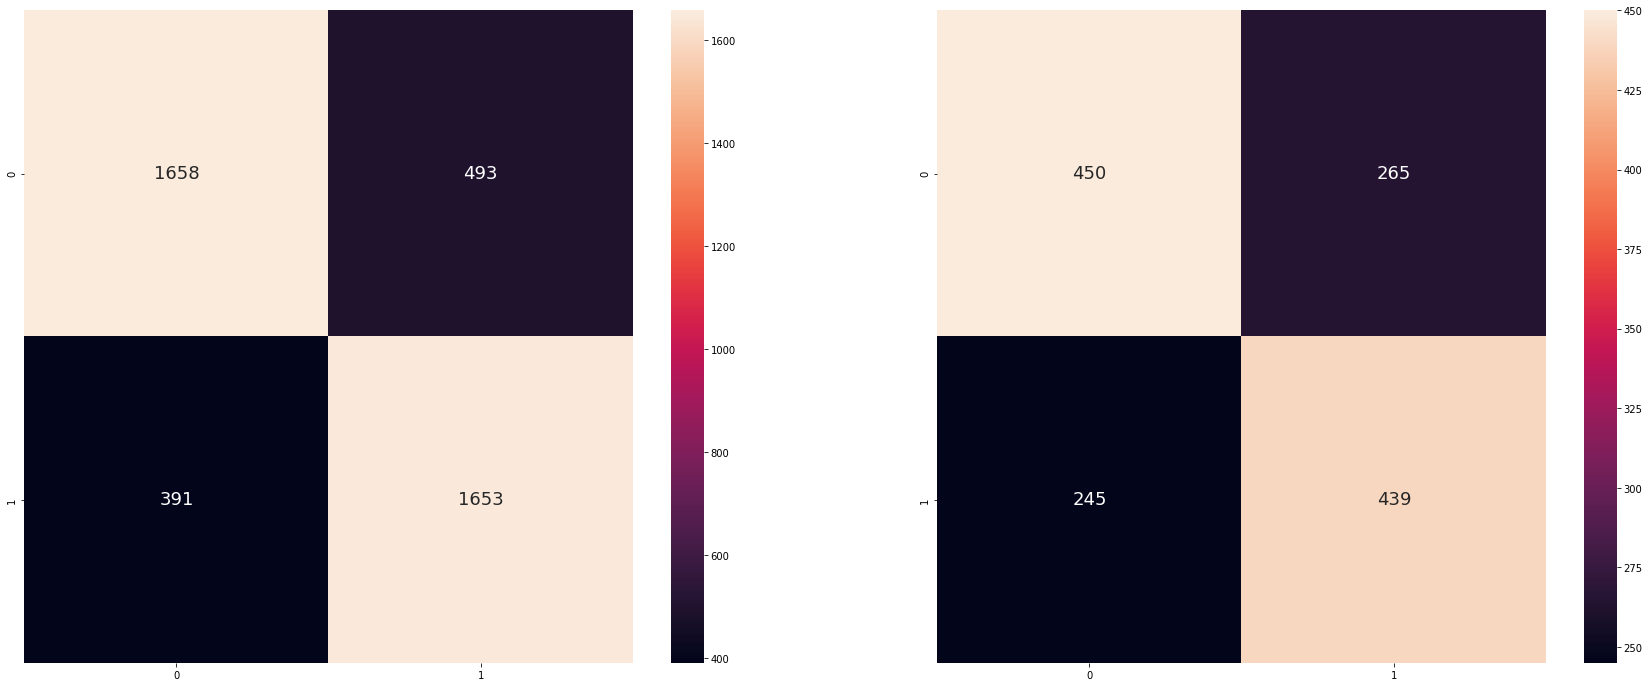

In [101]:
predictors = ['median_playtime', 'price','achievements','english','required_age','release_date','most_voted_tag_values','developer_values']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

# Random Forest using Train Data
rf = RandomForestClassifier(n_estimators = 200, max_depth = 9, min_samples_split=4, min_samples_leaf=2)  #update parameters based on search
rf.fit(X_train, y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()
rfscore = rf.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [102]:

## Calculating feature importance
feature_importance = pd.DataFrame(rf.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending = False)
print(feature_importance)

                       importance
price                    0.242835
median_playtime          0.223288
achievements             0.161034
developer_values         0.153344
release_date             0.116259
most_voted_tag_values    0.085202
required_age             0.015174
english                  0.002863


### NAIVE BAYES CLASSIFIER

In [ ]:
predictors = ['median_playtime', 'price','achievements','english','required_age','release_date','most_voted_tag_values','developer_values']
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0) 


model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
nbscore = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ',nbscore)





Train Set : (4195, 8) (4195, 1)
Test Set  : (1399, 8) (1399, 1)
Target on train data [0 0 0 ... 1 0 0]
accuracy_score on train dataset :  0.6088200238379022
Target on test data [0 0 0 ... 0 0 1]
accuracy_score on test dataset :  0.6047176554681916


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


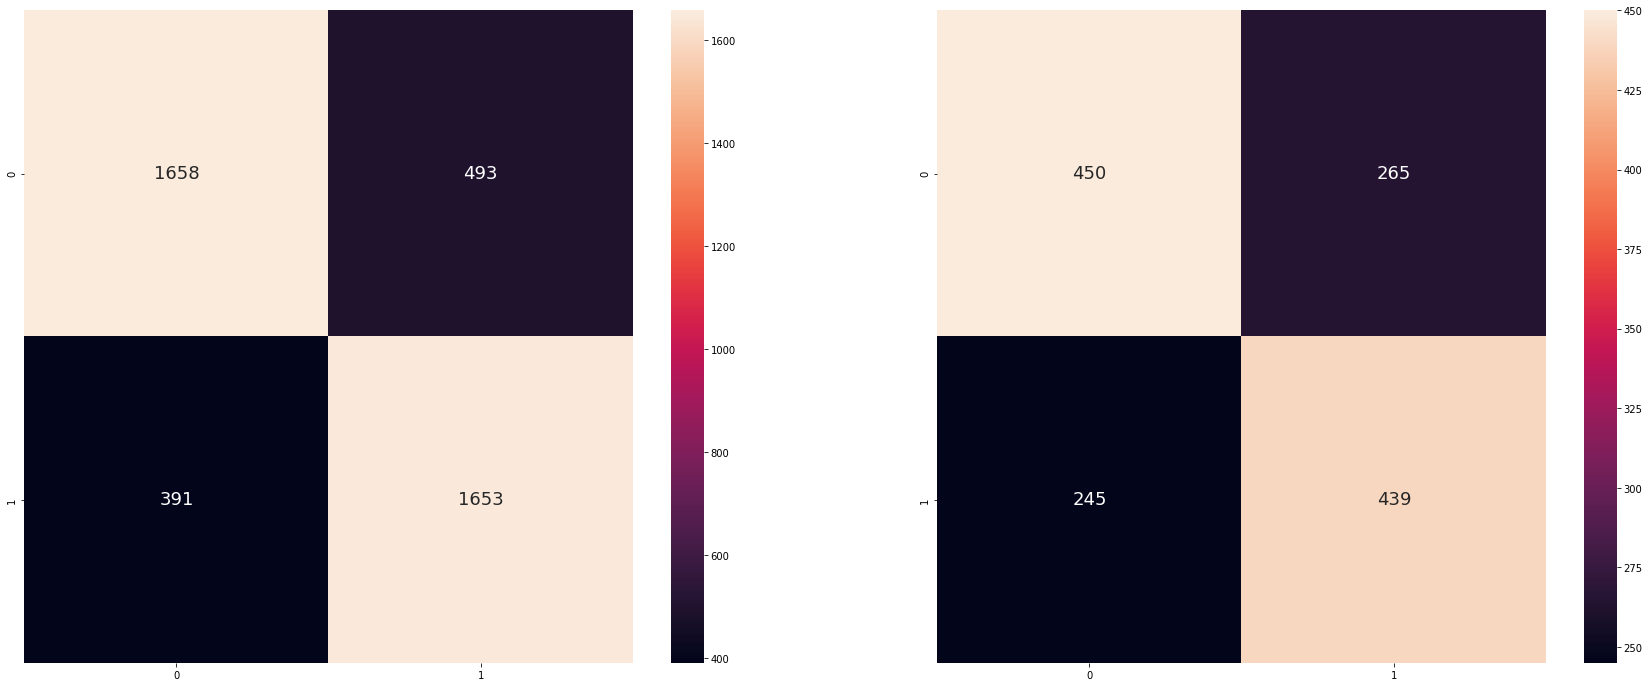

In [106]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Bivariate Analysis - Naive Bayes

In [116]:
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter['median_playtime'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0) 


model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
nbscore = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ',nbscore)

Target on train data [0 0 0 ... 0 0 0]
accuracy_score on train dataset :  0.5134684147794994
Target on test data [0 0 0 ... 1 0 0]
accuracy_score on test dataset :  0.5067905646890636


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


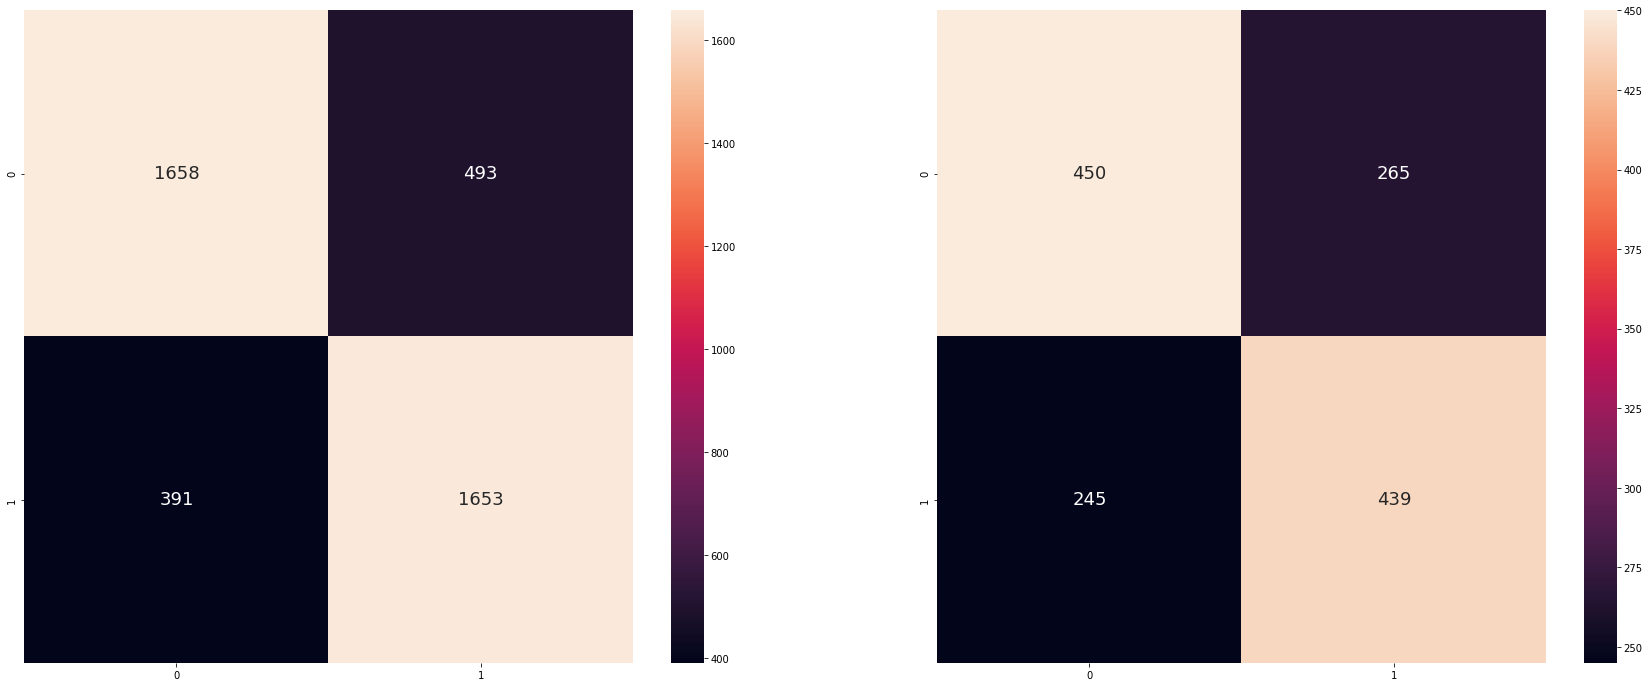

In [117]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [114]:
y = pd.DataFrame(stmFilter['tier'])
X = pd.DataFrame(stmFilter['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0) 


model = GaussianNB()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
nbscore = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ',nbscore)

Target on train data [0 0 0 ... 1 0 0]
accuracy_score on train dataset :  0.5842669845053635
Target on test data [0 0 0 ... 0 0 1]
accuracy_score on test dataset :  0.5761258041458185


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


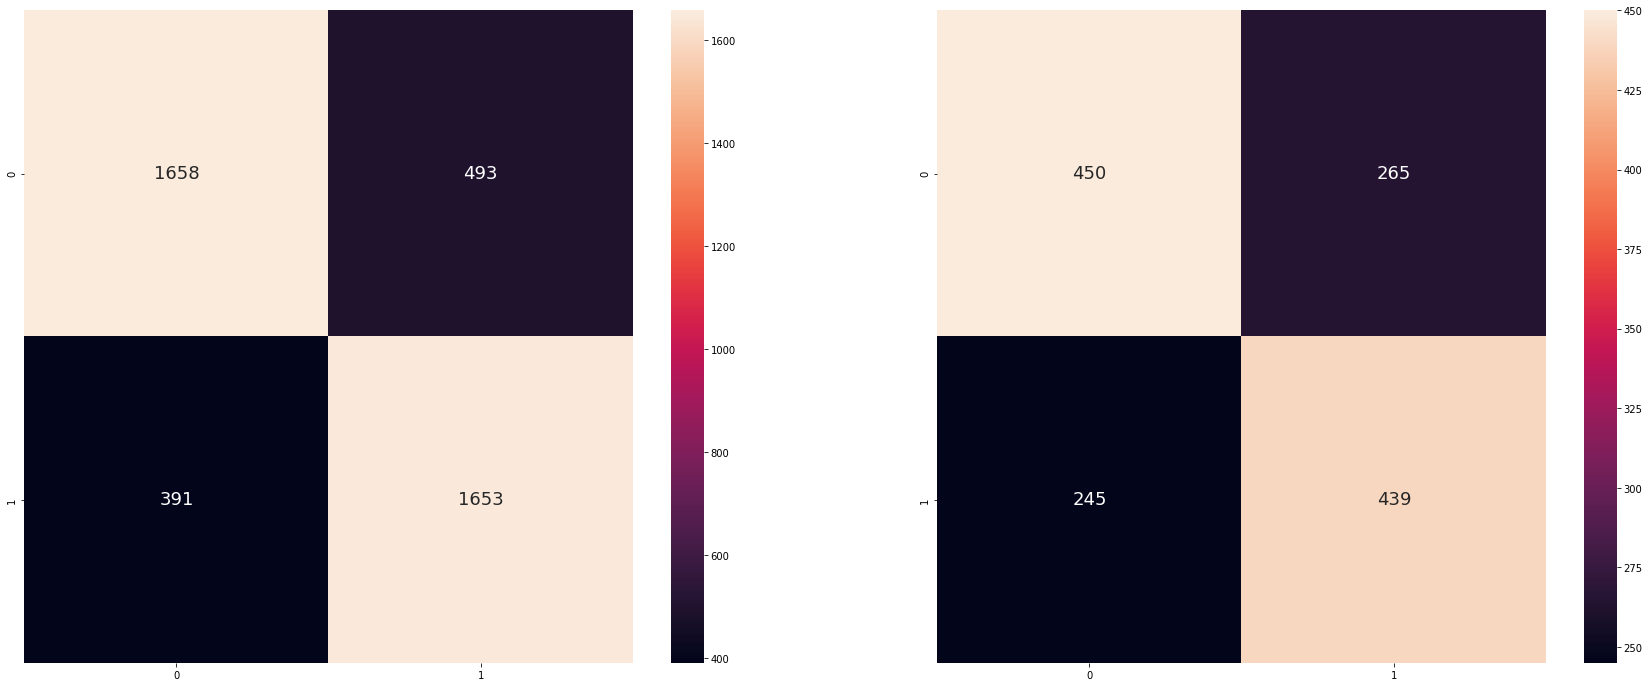

In [115]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])